In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import os

In [2]:
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Day1_Create the  population & employment data in MSA region

## <font color='#F7DC6F '>Read Historical Delineation Files of the MSA regions</font>

In [3]:
# from shapely.geometry import box

# msa_shp = gpd.read_file('tl_2019_us_cbsa.zip')

# # filter out only the MSAs in the mainland US
# minx, miny, maxx, maxy = -124.763068, 24.523096, -66.949895, 49.384358
# bbox = box(minx, miny, maxx, maxy)
# bbox_gdf = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=msa_shp.crs)

# msa_shp = gpd.clip(msa_shp, bbox_gdf)
# msa_shp

In [4]:
msa_shp = gpd.read_file('tl_2019_us_cbsa.zip')
msa_shp

,CSAFP,CBSAFP,GEOID,NAME,NAMELSAD,LSAD,MEMI,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,122,12020,12020,"Athens-Clarke County, GA","Athens-Clarke County, GA Metro Area",M1,1,G3110,2654601832,26140309,+33.9439840,-083.2138965,"POLYGON ((-83.53739 33.96591, -83.53184 33.968..."
1,122,12060,12060,"Atlanta-Sandy Springs-Alpharetta, GA","Atlanta-Sandy Springs-Alpharetta, GA Metro Area",M1,1,G3110,22494938651,387716575,+33.6937280,-084.3999113,"POLYGON ((-85.33823 33.65312, -85.33842 33.654..."
2,428,12100,12100,"Atlantic City-Hammonton, NJ","Atlantic City-Hammonton, NJ Metro Area",M1,1,G3110,1438776649,301268696,+39.4693555,-074.6337591,"POLYGON ((-74.85675 39.42076, -74.85670 39.420..."
3,194,12220,12220,"Auburn-Opelika, AL","Auburn-Opelika, AL Metro Area",M1,1,G3110,1573514768,21526461,+32.6040644,-085.3530477,"POLYGON ((-85.29322 32.73073, -85.28826 32.730..."
4,NaN,12260,12260,"Augusta-Richmond County, GA-SC","Augusta-Richmond County, GA-SC Metro Area",M1,1,G3110,9015028913,262514053,+33.4603713,-081.9828327,"POLYGON ((-82.21865 33.68630, -82.21856 33.686..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,NaN,48660,48660,"Wichita Falls, TX","Wichita Falls, TX Metro Area",M1,1,G3110,6784838328,143920414,+33.7761441,-098.5019073,"POLYGON ((-98.95320 33.83402, -98.95320 33.838..."
388,558,48700,48700,"Williamsport, PA","Williamsport, PA Metro Area",M1,1,G3110,3182485518,39032440,+41.3438824,-077.0552624,"POLYGON ((-77.42693 41.27734, -77.42734 41.278..."
389,NaN,48900,48900,"Wilmington, NC","Wilmington, NC Metro Area",M1,1,G3110,2754572932,516647220,+34.4260331,-077.8896340,"POLYGON ((-78.02992 34.33177, -78.03074 34.331..."
390,548,49020,49020,"Winchester, VA-WV","Winchester, VA-WV Metro Area",M1,1,G3110,2752545068,16892497,+39.2729744,-078.4718276,"POLYGON ((-78.50813 39.08863, -78.50853 39.088..."


In [5]:
print('The count of MSAs:', msa_shp['NAMELSAD'].unique().size)
print('The count of CBSAs:', msa_shp['CBSAFP'].unique().size)

The count of MSAs: 392
The count of CBSAs: 392


<Axes: >

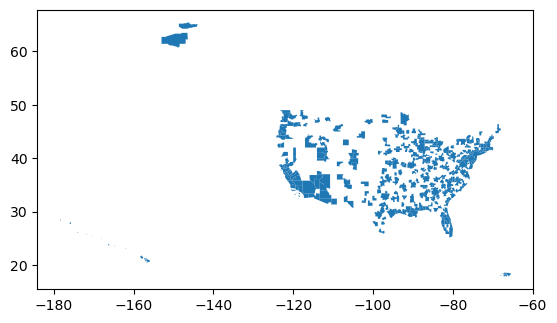

In [6]:
msa_shp.plot()

In [7]:
msa_us = pd.read_excel('list1_2020.xls',dtype={'FIPS State Code': 'object', 'FIPS County Code': 'object', 'CBSA Code':'object', 'CSA Code':'object'},header=2)
msa_us = msa_us[msa_us['Metropolitan/Micropolitan Statistical Area'] == 'Metropolitan Statistical Area'].reset_index(drop=True)
msa_us['fips_couty'] = msa_us['FIPS State Code'] + msa_us['FIPS County Code']
msa_us = msa_us[['CBSA Code','CBSA Title','Metropolitan/Micropolitan Statistical Area','County/County Equivalent','fips_couty','Central/Outlying County']]

In [8]:
msa_us

,CBSA Code,CBSA Title,Metropolitan/Micropolitan Statistical Area,County/County Equivalent,fips_couty,Central/Outlying County
0,10180,"Abilene, TX",Metropolitan Statistical Area,Callahan County,48059,Outlying
1,10180,"Abilene, TX",Metropolitan Statistical Area,Jones County,48253,Outlying
2,10180,"Abilene, TX",Metropolitan Statistical Area,Taylor County,48441,Central
3,10380,"Aguadilla-Isabela, PR",Metropolitan Statistical Area,Aguada Municipio,72003,Central
4,10380,"Aguadilla-Isabela, PR",Metropolitan Statistical Area,Aguadilla Municipio,72005,Central
...,...,...,...,...,...,...
1246,49660,"Youngstown-Warren-Boardman, OH-PA",Metropolitan Statistical Area,Trumbull County,39155,Central
1247,49660,"Youngstown-Warren-Boardman, OH-PA",Metropolitan Statistical Area,Mercer County,42085,Central
1248,49700,"Yuba City, CA",Metropolitan Statistical Area,Sutter County,06101,Central
1249,49700,"Yuba City, CA",Metropolitan Statistical Area,Yuba County,06115,Central


In [9]:
print('The count of CBSAs in msa_us file:', msa_us['CBSA Code'].unique().size)

import pandas as pd

# check whether all CBSAFP codes in msa are found in msa_us['CBSA Code']
result = msa_shp['CBSAFP'].isin(msa_us['CBSA Code'])

# cheeck which CBSAFP codes are not found in msa_us['CBSA Code']
not_found = msa_shp.loc[~result, 'CBSAFP']

# print the result
if not_found.empty:
    print("All CBSAFP codes in msa_shp are found in msa_us['CBSA Code'].")
else:
    print("The following CBSAFP codes are not found in msa_us['CBSA Code']:")
    print(not_found)

The count of CBSAs in msa_us file: 392
All CBSAFP codes in msa_shp are found in msa_us['CBSA Code'].


In [10]:
msa_us = msa_us.merge(msa_shp[['CBSAFP','NAMELSAD']], left_on='CBSA Code', right_on='CBSAFP', how='left')
msa_us

,CBSA Code,CBSA Title,Metropolitan/Micropolitan Statistical Area,County/County Equivalent,fips_couty,Central/Outlying County,CBSAFP,NAMELSAD
0,10180,"Abilene, TX",Metropolitan Statistical Area,Callahan County,48059,Outlying,10180,"Abilene, TX Metro Area"
1,10180,"Abilene, TX",Metropolitan Statistical Area,Jones County,48253,Outlying,10180,"Abilene, TX Metro Area"
2,10180,"Abilene, TX",Metropolitan Statistical Area,Taylor County,48441,Central,10180,"Abilene, TX Metro Area"
3,10380,"Aguadilla-Isabela, PR",Metropolitan Statistical Area,Aguada Municipio,72003,Central,10380,"Aguadilla-Isabela, PR Metro Area"
4,10380,"Aguadilla-Isabela, PR",Metropolitan Statistical Area,Aguadilla Municipio,72005,Central,10380,"Aguadilla-Isabela, PR Metro Area"
...,...,...,...,...,...,...,...,...
1246,49660,"Youngstown-Warren-Boardman, OH-PA",Metropolitan Statistical Area,Trumbull County,39155,Central,49660,"Youngstown-Warren-Boardman, OH-PA Metro Area"
1247,49660,"Youngstown-Warren-Boardman, OH-PA",Metropolitan Statistical Area,Mercer County,42085,Central,49660,"Youngstown-Warren-Boardman, OH-PA Metro Area"
1248,49700,"Yuba City, CA",Metropolitan Statistical Area,Sutter County,06101,Central,49700,"Yuba City, CA Metro Area"
1249,49700,"Yuba City, CA",Metropolitan Statistical Area,Yuba County,06115,Central,49700,"Yuba City, CA Metro Area"


## <font color='#F7DC6F '>Read Geometry Data at Tract Level in U.S Mainland regions</font>

In [11]:
# import pandas as pd
# import geopandas as gpd

# tracts_us = pd.DataFrame()

# exclude_states = ['02', '15', '72', '78', '60', '66', '69', '74', '75', '79', '81', '84', '86', '87', '89', '71']

# for i in range(80):
#     state = str(i).zfill(2)
#     if state in exclude_states:
#         continue
#     try:
#         url = 'https://www2.census.gov/geo/tiger/TIGER2020/TRACT/tl_2020_'+state+'_tract.zip'
#         tracts = gpd.read_file(url)
#         tracts_us = pd.concat([tracts_us, tracts])
#         print(f"Processed state: {state}")
#     except Exception as e:
#         print(f"Error processing state {state}: {e}")
#         continue

# tracts_us.plot()

<Axes: >

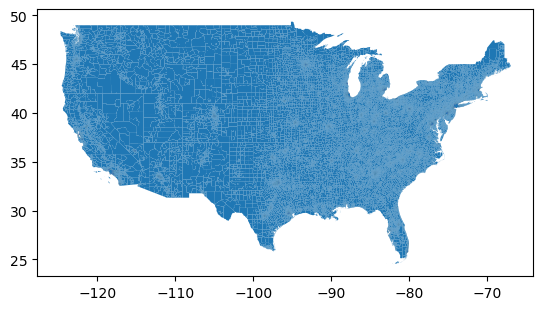

In [12]:
# read the API from the tiger line at Tract level
tracts_us = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_tract_500k.zip')
# filter the outlines to only include the US states
exclude_states = ['02', '15', '72', '78', '60', '66', '69', '74', '75', '79', '81', '84', '86', '87', '89', '71']
tracts_us = tracts_us[~tracts_us['STATEFP'].isin(exclude_states)].reset_index(drop=True)
tracts_us['fips_couty'] = tracts_us['STATEFP'] + tracts_us['COUNTYFP']
tracts_us = tracts_us[['fips_couty','GEOID','ALAND','geometry']]

tracts_us.plot()

## <font color='#F7DC6F '>Merge MSA data into Tract Geometry Data</font>

In [13]:
msa_us_merge = msa_us.merge(tracts_us, on='fips_couty', how='left')
msa_us_merge = msa_us_merge.dropna()

msa_us_merge = gpd.GeoDataFrame(msa_us_merge, geometry='geometry',crs=tracts_us.crs)

In [14]:
msa_us_merge['NAMELSAD'].value_counts()

NAMELSAD
New York-Newark-Jersey City, NY-NJ-PA Metro Area           4534
Los Angeles-Long Beach-Anaheim, CA Metro Area              2926
Chicago-Naperville-Elgin, IL-IN-WI Metro Area              2210
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Metro Area     1476
Washington-Arlington-Alexandria, DC-VA-MD-WV Metro Area    1360
                                                           ... 
Grants Pass, OR Metro Area                                   16
Columbus, IN Metro Area                                      15
Carson City, NV Metro Area                                   14
Walla Walla, WA Metro Area                                   12
Enid, OK Metro Area                                          12
Name: count, Length: 380, dtype: int64

## <font color='#F7DC6F '>Read population and employment data by API </font>

In [15]:
# import json
# import pandas as pd
# from census import Census
# from us import states

# # Read Census API key
# with open("census_api_key_Houpu.json", 'r') as f:
#     key_file = f.read()
# my_api_key = json.loads(key_file)['key']

# def fetch_census_data(fields):
#     """
#     Fetches census data for the specified fields in 2020 for all counties and tracts across the U.S.

#     Parameters:
#     - api_key: str, Census API key.
#     - fields: list of str, the specific columns to retrieve.
#     """
    
#     c = Census(my_api_key)
#     df = pd.DataFrame()
    
#     for state in states.STATES:
#         state_fips = state.fips
#         data = c.acs5.state_county_tract(fields=fields,
#                                          state_fips=state_fips,
#                                          county_fips="*",  # fetch all the counties
#                                          tract="*",  # fetch all the tracts
#                                          year=2019)
        
#         state_df = pd.DataFrame(data)
#         df = pd.concat([df, state_df], ignore_index=True)
    
#     df['year'] = 2019
    
#     return df

In [16]:
# fields = ['NAME', 'B01003_001E']  # B01003_001E:total population
# pop_20 = fetch_census_data(fields)
# pop_20 = pop_20.rename(columns={'B01003_001E':'tot_pop'})
# pop_20['GEOID'] = pop_20['state'] + pop_20['county'] + pop_20['tract']

In [17]:
# fields = ['NAME', 'B23001_001E']  # B23001_001:total employment for the 16 years old and over
# emp_20 = fetch_census_data(fields)
# emp_20 = emp_20.rename(columns={'B23001_001E':'tot_emp'})
# emp_20['GEOID'] = emp_20['state'] + emp_20['county'] + emp_20['tract']

In [18]:
import requests
import pandas as pd

# Step 1: Fetch the data from the API
url = 'https://api.census.gov/data/2019/acs/acs5?get=group(B01003)&ucgid=pseudo(0100000US$1400000)'
response = requests.get(url)
data = response.json()

# Step 2: Convert the JSON response to a pandas DataFrame
columns = data[0]
rows = data[1:]
pop_19 = pd.DataFrame(rows, columns=columns)

In [19]:
pop_19 = pop_19.rename(columns={'B01003_001E':'tot_pop'})
pop_19['tot_pop'] = pop_19['tot_pop'].astype(int)
pop_19['GEOID'] = pop_19['GEO_ID'].str[9:]
pop_19 = pop_19[['GEOID','tot_pop']]

In [20]:
emp_19 = pd.read_csv('ACSDT5Y2019.B23025-Data.csv')
emp_19 = emp_19.iloc[1:,:]
emp_19 = emp_19.rename(columns={'B23025_004E':'tot_emp'})
emp_19['tot_emp'] = emp_19['tot_emp'].astype(int)
emp_19['GEOID'] = emp_19['GEO_ID'].str[9:]
emp_19 = emp_19[['GEOID','tot_emp']]

## <font color='#F7DC6F '>Integrate the data into MSA geomotry data</font>

In [21]:
msa_us_merge = msa_us_merge.merge(pop_19[['GEOID','tot_pop']], on='GEOID', how='left').merge(emp_19[['GEOID','tot_emp']], on='GEOID', how='left').dropna().reset_index(drop=True)

In [22]:
msa_us_merge.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 60543 entries, 0 to 60542
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   CBSA Code                                   60543 non-null  object  
 1   CBSA Title                                  60543 non-null  object  
 2   Metropolitan/Micropolitan Statistical Area  60543 non-null  object  
 3   County/County Equivalent                    60543 non-null  object  
 4   fips_couty                                  60543 non-null  object  
 5   Central/Outlying County                     60543 non-null  object  
 6   CBSAFP                                      60543 non-null  object  
 7   NAMELSAD                                    60543 non-null  object  
 8   GEOID                                       60543 non-null  object  
 9   ALAND                                       60543 non-null  floa

In [23]:
msa_us_merge['NAMELSAD'].value_counts()

NAMELSAD
New York-Newark-Jersey City, NY-NJ-PA Metro Area           4534
Los Angeles-Long Beach-Anaheim, CA Metro Area              2926
Chicago-Naperville-Elgin, IL-IN-WI Metro Area              2210
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Metro Area     1476
Washington-Arlington-Alexandria, DC-VA-MD-WV Metro Area    1360
                                                           ... 
Grants Pass, OR Metro Area                                   16
Columbus, IN Metro Area                                      15
Carson City, NV Metro Area                                   14
Walla Walla, WA Metro Area                                   12
Enid, OK Metro Area                                          12
Name: count, Length: 380, dtype: int64

<Axes: >

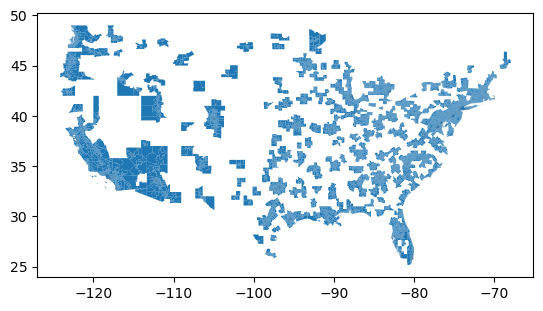

In [24]:
msa_us_merge.plot()

[MSA map published by United States Census Bureau](https://www.census.gov/geographies/reference-maps/2020/geo/cbsa.html)

# Day2&3_Delineate the Polycentric and Monocentric analysis by LISA

## <font color='#F7DC6F '>Delineate the Main Center by Local Moran'I</font>

In [25]:
from pysal.viz import splot
from splot.esda import plot_moran
from pysal.explore import esda
from pysal.lib import weights
from esda.moran import Moran
from libpysal.weights import Queen, KNN
from numpy.random import seed

from splot import esda as esdaplot

In [26]:
msa_us_merge = msa_us_merge.to_crs(epsg=3857)

In [27]:
msa_us_merge['area'] = msa_us_merge['geometry'].area
msa_us_merge['tot_pop_density'] = (msa_us_merge['tot_pop'] / msa_us_merge['area']) * 1000000
msa_us_merge['tot_emp_density'] = (msa_us_merge['tot_emp'] / msa_us_merge['area']) * 1000000

In [28]:
msa_us_merge[['tot_pop_density','tot_emp_density']].describe()

,tot_pop_density,tot_emp_density
count,60543.00,60543.00
mean,1468.10,728.55
std,2838.23,1472.99
min,0.00,0.00
25%,204.99,92.92
50%,696.44,328.50
75%,1498.95,727.44
max,73317.10,39195.30


### LISA by Total Population

In [29]:
# create a new datafram to store the results of lisa
lisa_results_pop = pd.DataFrame()

for msa_id, msa_data in msa_us_merge.groupby('NAMELSAD'):

    w = KNN.from_dataframe(msa_data, k=8)
    w.transform = 'R'
    
    lisa = esda.moran.Moran_Local(msa_data["tot_pop_density"], w, permutations=9999)
    
    msa_data['LISA'] = lisa.Is
    msa_data['LISA_p'] = lisa.p_sim
    msa_data['LISA_q'] = lisa.q  # Quadrant information
    
    lisa_results_pop = pd.concat([lisa_results_pop, msa_data])
    
lisa_results_pop = gpd.GeoDataFrame(lisa_results_pop, geometry='geometry', crs="EPSG:3857")
lisa_results_pop['sig'] = (lisa_results_pop['LISA_p'] < 0.01) * 1

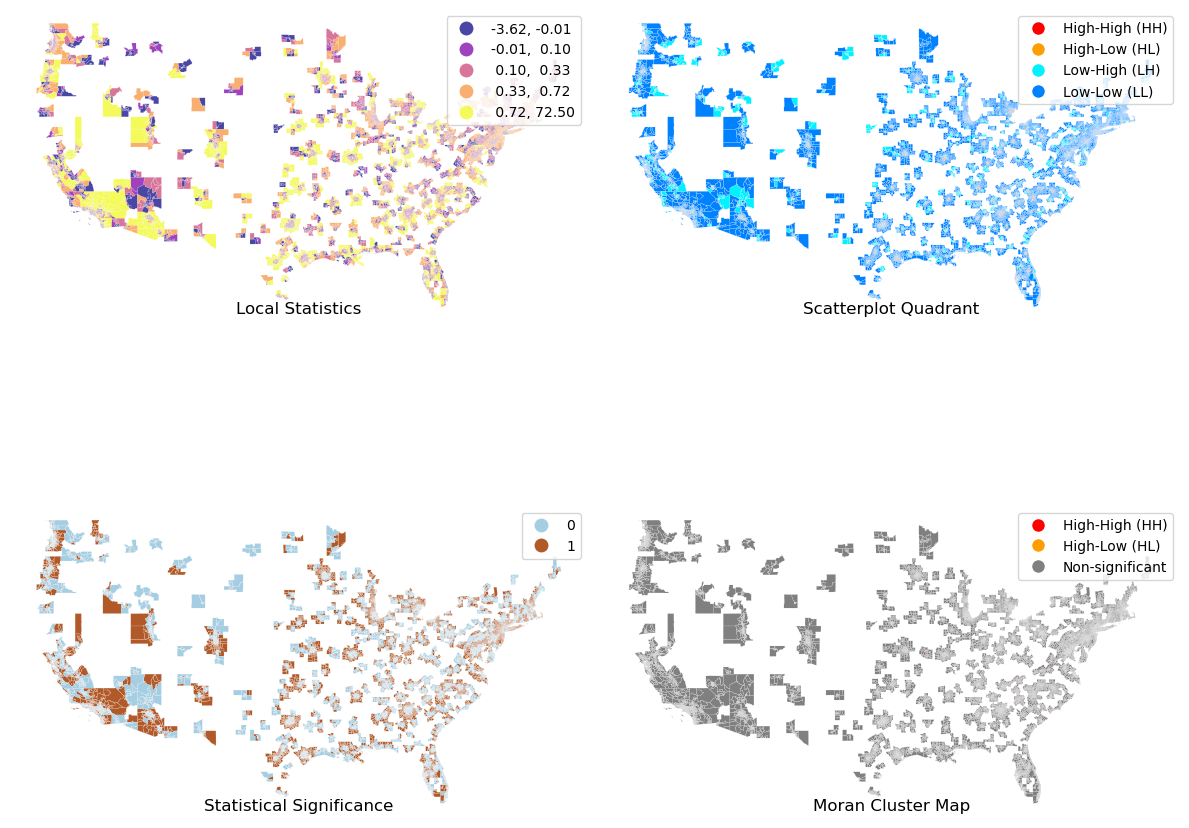

In [30]:
# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()

# Subplot 1 #
# Choropleth of local statistics
lisa_results_pop.plot(
    column="LISA",
    cmap="plasma",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    ax=axs[0],
)

# Subplot 2 #
# Quadrant categories
quadrant_cmap = {
    1: '#FF0000',    # HH
    2: '#00F2FF',   # LH
    3: '#0082FF',  # LL
    4: '#FF9E00'  # HL
}

# Apply the colormap to the LISA_q column
lisa_results_pop['quadrant_color'] = lisa_results_pop['LISA_q'].map(quadrant_cmap)

# Create a custom legend
quadrant_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=quadrant_cmap[i], markersize=10, label=label)
                    for i, label in zip([1, 4, 2, 3], ['High-High (HH)', 'High-Low (HL)', 'Low-High (LH)','Low-Low (LL)'])]

lisa_results_pop.plot(
    color=lisa_results_pop['quadrant_color'],
    linewidth=0.1,
    edgecolor="white",
    legend=False,
    ax=axs[1],
)
axs[1].legend(handles=quadrant_handles)

# Subplot 3 #
# Significance map
lisa_results_pop.plot(
    column="sig",
    categorical=True,
    k=2,
    cmap="Paired",
    linewidth=0.1,
    edgecolor="white",
    legend=True,
    ax=axs[2],
)

# Subplot 4 #
# Cluster map
cluster_colors = {0: 'grey', 1: '#FF0000', 4: '#FF9E00'}
lisa_results_pop['cluster_color'] = np.where(
    (lisa_results_pop['sig'] == 1) & (lisa_results_pop['LISA_q'].isin([1, 4])),
    lisa_results_pop['LISA_q'].map(cluster_colors),
    'grey'
)

# Create a custom legend for clusters
cluster_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cluster_colors[i], markersize=10, label=label)
                   for i, label in zip([1, 4, 0], ['High-High (HH)', 'High-Low (HL)', 'Non-significant'])]

lisa_results_pop.plot(
    color=lisa_results_pop['cluster_color'],
    linewidth=0.1,
    edgecolor="white",
    legend=False,
    ax=axs[3],
)
axs[3].legend(handles=cluster_handles)

# Figure styling #
# Set title to each subplot
for i, ax in enumerate(axs.flatten()):
    ax.set_axis_off()
    ax.set_title(
        [
            "Local Statistics",
            "Scatterplot Quadrant",
            "Statistical Significance",
            "Moran Cluster Map",
        ][i],
        y=0,
    )
# Tight layout to minimise in-between white space
f.tight_layout()

# Display the figure
plt.show()

In [31]:
# lisa_results_pop.to_file('lisa_results_popden_0.01.shp')

### LISA by Total Employment

In [32]:
# create a new datafram to store the results of lisa
lisa_results_emp = pd.DataFrame()

for msa_id, msa_data in msa_us_merge.groupby('NAMELSAD'):

    w = KNN.from_dataframe(msa_data, k=8)
    w.transform = 'R'
    
    lisa = esda.moran.Moran_Local(msa_data["tot_emp_density"], w, permutations=9999)
    
    msa_data['LISA'] = lisa.Is
    msa_data['LISA_p'] = lisa.p_sim
    msa_data['LISA_q'] = lisa.q  # Quadrant information
    
    lisa_results_emp = pd.concat([lisa_results_emp, msa_data])
    
lisa_results_emp = gpd.GeoDataFrame(lisa_results_emp, geometry='geometry', crs="EPSG:3857")
lisa_results_emp['sig'] = (lisa_results_emp['LISA_p'] < 0.01) * 1

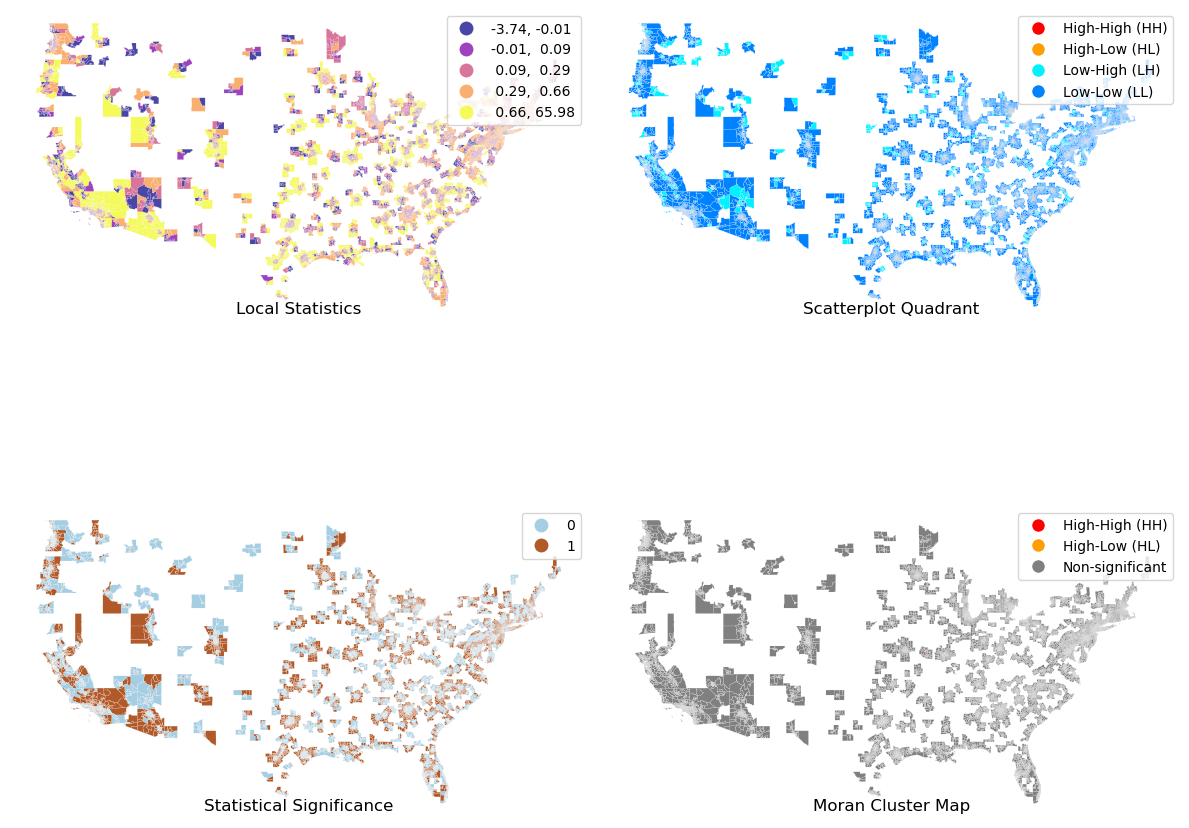

In [33]:
# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()

# Subplot 1 #
# Choropleth of local statistics
lisa_results_emp.plot(
    column="LISA",
    cmap="plasma",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    ax=axs[0],
)

# Subplot 2 #
# Quadrant categories
quadrant_cmap = {
    1: '#FF0000',    # HH
    2: '#00F2FF',   # LH
    3: '#0082FF',  # LL
    4: '#FF9E00'  # HL
}

# Apply the colormap to the LISA_q column
lisa_results_emp['quadrant_color'] = lisa_results_emp['LISA_q'].map(quadrant_cmap)

# Create a custom legend
quadrant_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=quadrant_cmap[i], markersize=10, label=label)
                    for i, label in zip([1, 4, 2, 3], ['High-High (HH)', 'High-Low (HL)', 'Low-High (LH)','Low-Low (LL)'])]

lisa_results_emp.plot(
    color=lisa_results_emp['quadrant_color'],
    linewidth=0.1,
    edgecolor="white",
    legend=False,
    ax=axs[1],
)
axs[1].legend(handles=quadrant_handles)

# Subplot 3 #
# Significance map
lisa_results_emp.plot(
    column="sig",
    categorical=True,
    k=2,
    cmap="Paired",
    linewidth=0.1,
    edgecolor="white",
    legend=True,
    ax=axs[2],
)

# Subplot 4 #
# Cluster map
cluster_colors = {0: 'grey', 1: '#FF0000', 4: '#FF9E00'}
lisa_results_emp['cluster_color'] = np.where(
    (lisa_results_emp['sig'] == 1) & (lisa_results_emp['LISA_q'].isin([1, 4])),
    lisa_results_emp['LISA_q'].map(cluster_colors),
    'grey'
)

# Create a custom legend for clusters
cluster_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cluster_colors[i], markersize=10, label=label)
                   for i, label in zip([1, 4, 0], ['High-High (HH)', 'High-Low (HL)', 'Non-significant'])]

lisa_results_emp.plot(
    color=lisa_results_emp['cluster_color'],
    linewidth=0.1,
    edgecolor="white",
    legend=False,
    ax=axs[3],
)
axs[3].legend(handles=cluster_handles)

# Figure styling #
# Set title to each subplot
for i, ax in enumerate(axs.flatten()):
    ax.set_axis_off()
    ax.set_title(
        [
            "Local Statistics",
            "Scatterplot Quadrant",
            "Statistical Significance",
            "Moran Cluster Map",
        ][i],
        y=0,
    )
# Tight layout to minimise in-between white space
f.tight_layout()

# Display the figure
plt.show()

In [34]:
# lisa_results_emp.to_file('lisa_results_empden_0.01.shp')

# Day 3_Contiguity Analysis - HH (High-High) and HL (High-Low) Combination

In [35]:
# pick up HH and HL clusters tracts
polycentric = lisa_results_pop[((lisa_results_pop['LISA_q'] == 1) | (lisa_results_pop['LISA_q'] == 4)) & (lisa_results_pop['sig'] == 1)].reset_index(drop=True)

In [36]:
# dissolved_polycentric = polycentric.dissolve(by='NAMELSAD', aggfunc={'tot_pop': 'sum', 'tot_emp': 'sum'})
# dissolved_polycentric['area'] = dissolved_polycentric['geometry'].area
# dissolved_polycentric['tot_pop_density'] = (dissolved_polycentric['tot_pop'] / dissolved_polycentric['area']) * 1000000

In [37]:
# dissolved geometry in each MSA
dissolved_polycentric = polycentric.dissolve(by='NAMELSAD').reset_index()
dissolved_polycentric = dissolved_polycentric[['NAMELSAD','geometry']]

# explore the multipolygon into ploygon
exploded_polycentric = dissolved_polycentric.explode(column='geometry', ignore_index=True)

In [38]:
# calculate the total population in each combined polygon
spatial_joined_within = gpd.sjoin(polycentric, exploded_polycentric, how='inner', op='within')
total_pop_sum = spatial_joined_within.groupby('index_right')['tot_pop'].sum().reset_index()
exploded_polycentric = exploded_polycentric.merge(total_pop_sum, left_index=True, right_on='index_right', how='left').drop(columns='index_right')

In [39]:
exploded_polycentric['area'] = exploded_polycentric['geometry'].area
exploded_polycentric['tot_pop_density'] = (exploded_polycentric['tot_pop'] / exploded_polycentric['area']) * 1000000  # per square km

In [40]:
exploded_polycentric

,NAMELSAD,geometry,tot_pop,area,tot_pop_density
0.00,"Abilene, TX Metro Area","POLYGON ((-11105183.911 3818221.040, -11105284...",40798.00,42078106.11,969.58
1.00,"Akron, OH Metro Area","POLYGON ((-9075613.162 5019381.840, -9075622.7...",49548.00,46063655.09,1075.64
2.00,"Akron, OH Metro Area","POLYGON ((-9072022.564 5029893.264, -9072067.0...",37428.00,40200873.58,931.02
3.00,"Akron, OH Metro Area","POLYGON ((-9069787.260 5025740.591, -9069537.6...",5555.00,5861189.99,947.76
4.00,"Albany, GA Metro Area","POLYGON ((-9374108.726 3704259.658, -9374095.2...",50932.00,116184471.79,438.37
...,...,...,...,...,...
813.00,"Youngstown-Warren-Boardman, OH-PA Metro Area","POLYGON ((-8959841.365 5048815.211, -8959823.9...",6167.00,7080695.94,870.96
814.00,"Youngstown-Warren-Boardman, OH-PA Metro Area","POLYGON ((-8946723.577 5071876.621, -8946504.3...",5459.00,8629447.46,632.60
815.00,"Yuba City, CA Metro Area","POLYGON ((-13544573.585 4739893.877, -13544455...",34204.00,37659940.33,908.23
816.00,"Yuba City, CA Metro Area","POLYGON ((-13533276.139 4745390.388, -13533069...",7981.00,7101790.39,1123.80


# Day 4_5_Polycentricity Metrics

In [41]:
exploded_polycentric.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 822 entries, 0.0 to 817.0
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   NAMELSAD         822 non-null    object  
 1   geometry         822 non-null    geometry
 2   tot_pop          818 non-null    float64 
 3   area             822 non-null    float64 
 4   tot_pop_density  818 non-null    float64 
dtypes: float64(3), geometry(1), object(1)
memory usage: 38.5+ KB


In [42]:
exploded_polycentric = exploded_polycentric[~exploded_polycentric['tot_pop'].isna()].reset_index(drop=True)
exploded_polycentric.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   NAMELSAD         818 non-null    object  
 1   geometry         818 non-null    geometry
 2   tot_pop          818 non-null    float64 
 3   area             818 non-null    float64 
 4   tot_pop_density  818 non-null    float64 
dtypes: float64(3), geometry(1), object(1)
memory usage: 32.1+ KB


In [43]:
exploded_polycentric['NAMELSAD'].value_counts()

NAMELSAD
Los Angeles-Long Beach-Anaheim, CA Metro Area         27
New York-Newark-Jersey City, NY-NJ-PA Metro Area      23
Miami-Fort Lauderdale-Pompano Beach, FL Metro Area    13
Detroit-Warren-Dearborn, MI Metro Area                13
Riverside-San Bernardino-Ontario, CA Metro Area       13
                                                      ..
Kalamazoo-Portage, MI Metro Area                       1
Kankakee, IL Metro Area                                1
Kingston, NY Metro Area                                1
Kokomo, IN Metro Area                                  1
Yuma, AZ Metro Area                                    1
Name: count, Length: 360, dtype: int64

In [44]:
# list(exploded_polycentric.groupby('NAMELSAD')['tot_pop'])

In [45]:
exploded_polycentric['tot_pop'].describe()

count       818.00
mean      41342.22
std       84702.24
min         882.00
25%        5847.50
50%       26301.00
75%       47393.25
max     1639103.00
Name: tot_pop, dtype: float64

In [46]:
namelsad_counts = exploded_polycentric['NAMELSAD'].value_counts()
count_distribution = namelsad_counts.value_counts().sort_index()
count_distribution

count
1     204
2      66
3      37
4      14
5      15
6       7
7       2
8       2
9       3
10      4
12      1
13      3
23      1
27      1
Name: count, dtype: int64

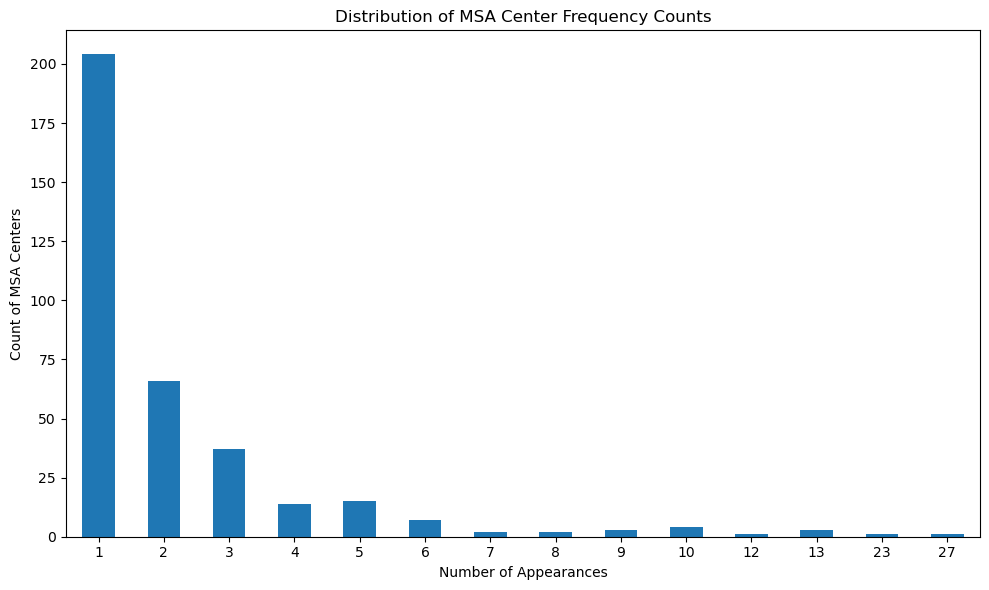

In [47]:
# create a bar plot
plt.figure(figsize=(10, 6))
count_distribution.plot(kind='bar')
plt.title('Distribution of MSA Center Frequency Counts')
plt.xlabel('Number of Appearances')
plt.ylabel('Count of MSA Centers')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [48]:
exploded_polycentric['ln_tot_pop'] = np.log(exploded_polycentric['tot_pop'])

In [49]:
# exploded_polycentric.to_file('exploded_polycentric.shp')

In [50]:
exploded_polycentric[exploded_polycentric['NAMELSAD'] == 'Akron, OH Metro Area']

,NAMELSAD,geometry,tot_pop,area,tot_pop_density,ln_tot_pop
1,"Akron, OH Metro Area","POLYGON ((-9075613.162 5019381.840, -9075622.7...",49548.00,46063655.09,1075.64,10.81
2,"Akron, OH Metro Area","POLYGON ((-9072022.564 5029893.264, -9072067.0...",37428.00,40200873.58,931.02,10.53
3,"Akron, OH Metro Area","POLYGON ((-9069787.260 5025740.591, -9069537.6...",5555.00,5861189.99,947.76,8.62


In [51]:
exploded_polycentric[exploded_polycentric['NAMELSAD'] == 'New York-Newark-Jersey City, NY-NJ-PA Metro Area']

,NAMELSAD,geometry,tot_pop,area,tot_pop_density,ln_tot_pop
500,"New York-Newark-Jersey City, NY-NJ-PA Metro Area","POLYGON ((-8237678.395 4953903.684, -8237764.5...",10948.00,819365.45,13361.56,9.30
501,"New York-Newark-Jersey City, NY-NJ-PA Metro Area","POLYGON ((-8237299.684 4954888.279, -8237234.6...",3602.00,283787.57,12692.59,8.19
502,"New York-Newark-Jersey City, NY-NJ-PA Metro Area","POLYGON ((-8238261.701 4958371.306, -8238099.5...",2187.00,292105.69,7487.02,7.69
503,"New York-Newark-Jersey City, NY-NJ-PA Metro Area","POLYGON ((-8237204.500 4958604.390, -8237449.1...",119315.00,7682192.88,15531.37,11.69
504,"New York-Newark-Jersey City, NY-NJ-PA Metro Area","POLYGON ((-8236479.687 4965836.353, -8236576.3...",3591.00,311483.12,11528.71,8.19
505,"New York-Newark-Jersey City, NY-NJ-PA Metro Area","POLYGON ((-8236539.798 4966680.477, -8236605.4...",12348.00,938154.18,13162.02,9.42
506,"New York-Newark-Jersey City, NY-NJ-PA Metro Area","POLYGON ((-8237236.428 4969628.731, -8237246.4...",963311.00,59822282.38,16102.88,13.78
507,"New York-Newark-Jersey City, NY-NJ-PA Metro Area","POLYGON ((-8241829.677 4977325.505, -8241871.7...",5017.00,586519.67,8553.85,8.52
508,"New York-Newark-Jersey City, NY-NJ-PA Metro Area","POLYGON ((-8237271.261 4977996.434, -8237300.8...",1639103.00,88090782.85,18606.98,14.31
509,"New York-Newark-Jersey City, NY-NJ-PA Metro Area","POLYGON ((-8239996.359 4980313.435, -8240031.6...",37785.00,2700131.98,13993.76,10.54


## First Method: Std method

In [52]:
exploded_polycentric['rank'] = exploded_polycentric.groupby('NAMELSAD')['tot_pop'].rank(ascending=False, method='first')

def calculate_sd_metrics(group):
    tot_pop = group['tot_pop']
    max_pop = tot_pop.max()
    hypothetical_sd = np.std([max_pop, 0])
    
    result = {}
    
    # 1.1 Calculate the standard deviation of all tot_pop in the group
    sd_all = np.std(tot_pop)
    result['std_dev_all'] = 1 - (sd_all / hypothetical_sd)
    
    # 1.2 Calculate the standard deviation of the top 2 to top 15 rankings separately
    for i in range(2, 16):
        if len(tot_pop) >= i:
            sd_top_i = np.std(tot_pop.nlargest(i))
            result[f'std_dev_{i}'] = 1 - (sd_top_i / hypothetical_sd)
        else:
            result[f'std_dev_{i}'] = np.nan
    
    # Calculate the mean of the standard deviations for rankings 2, 3, and 4
    ranks_2_to_4 = [result.get(f'std_dev_{i}', np.nan) for i in range(2, 5)]
    ## calculate the average only if when all values of 'std_dev_2','std_dev_3','std_dev_4' are not NaN
    if all(not np.isnan(value) for value in ranks_2_to_4):
        result['avg_std_dev_2_to_4'] = np.mean(ranks_2_to_4)
    else:
        result['avg_std_dev_2_to_4'] = np.nan
    
    return pd.Series(result)

In [53]:
# Apply the function to each group
sd_metrics = exploded_polycentric.groupby('NAMELSAD').apply(calculate_sd_metrics).reset_index()

In [54]:
sd_metrics.describe()

,std_dev_all,std_dev_2,std_dev_3,std_dev_4,std_dev_5,std_dev_6,std_dev_7,std_dev_8,std_dev_9,std_dev_10,std_dev_11,std_dev_12,std_dev_13,std_dev_14,std_dev_15,avg_std_dev_2_to_4
count,360.00,156.00,90.00,53.00,39.00,24.00,17.00,15.00,13.00,10.00,6.00,6.00,5.00,2.00,2.00,53.00
mean,0.68,0.34,0.29,0.30,0.31,0.34,0.37,0.37,0.38,0.39,0.40,0.42,0.43,0.48,0.49,0.36
std,0.39,0.27,0.18,0.13,0.08,0.06,0.04,0.03,0.04,0.05,0.05,0.05,0.06,0.05,0.04,0.17
min,0.02,0.02,0.07,0.13,0.17,0.28,0.31,0.31,0.31,0.32,0.32,0.33,0.34,0.44,0.46,0.08
25%,0.27,0.10,0.17,0.21,0.26,0.31,0.34,0.35,0.35,0.38,0.40,0.41,0.43,0.46,0.47,0.23
50%,1.00,0.27,0.24,0.27,0.30,0.34,0.36,0.37,0.38,0.39,0.41,0.42,0.43,0.48,0.49,0.36
75%,1.00,0.51,0.38,0.36,0.35,0.38,0.37,0.38,0.39,0.41,0.42,0.43,0.44,0.49,0.50,0.46
max,1.00,1.00,0.96,0.76,0.53,0.50,0.46,0.44,0.44,0.46,0.47,0.48,0.50,0.51,0.52,0.83


In [55]:
sd_metrics['std_dev_all'] = sd_metrics['std_dev_all'].apply(lambda x: 0 if x == 1 else x)
sd_metrics['avg_std_dev_2_to_4'] = sd_metrics['avg_std_dev_2_to_4'].apply(lambda x: 0 if pd.isna(x) else x)

In [56]:
sd_metrics

,NAMELSAD,std_dev_all,std_dev_2,std_dev_3,std_dev_4,std_dev_5,std_dev_6,std_dev_7,std_dev_8,std_dev_9,std_dev_10,std_dev_11,std_dev_12,std_dev_13,std_dev_14,std_dev_15,avg_std_dev_2_to_4
0,"Abilene, TX Metro Area",0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
1,"Akron, OH Metro Area",0.25,0.76,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,"Albany, GA Metro Area",0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3,"Albany-Lebanon, OR Metro Area",0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
4,"Albany-Schenectady-Troy, NY Metro Area",0.27,0.46,0.26,0.26,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,"Yakima, WA Metro Area",0.09,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
356,"York-Hanover, PA Metro Area",0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
357,"Youngstown-Warren-Boardman, OH-PA Metro Area",0.41,0.25,0.27,0.31,0.35,0.38,0.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.28
358,"Yuba City, CA Metro Area",0.23,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


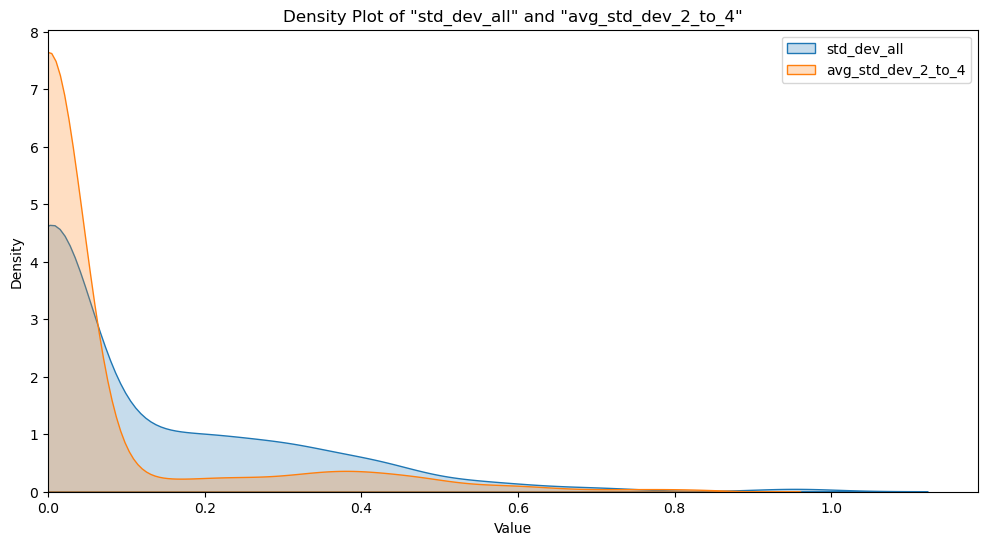

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 、setting the size of the figure
plt.figure(figsize=(12, 6))

# drawing the density figure of the std_dev_all
sns.kdeplot(sd_metrics['std_dev_all'], label='std_dev_all', fill=True)

# drawing the density figure of the avg_std_dev_2_to_4
sns.kdeplot(sd_metrics['avg_std_dev_2_to_4'], label='avg_std_dev_2_to_4', fill=True)

plt.xlim(0, None)

plt.title('Density Plot of "std_dev_all" and "avg_std_dev_2_to_4"')
plt.xlabel('Value')
plt.ylabel('Density')

plt.legend()

plt.show()

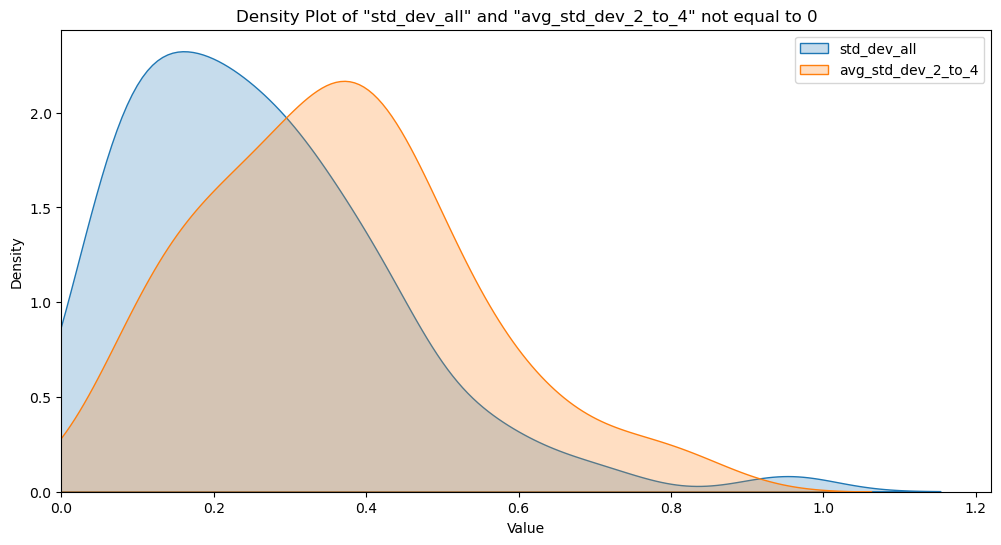

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

std_dev_all_filtered = sd_metrics[sd_metrics['std_dev_all'] != 0]['std_dev_all']

avg_std_dev_2_to_4_filtered = sd_metrics[sd_metrics['avg_std_dev_2_to_4'] != 0]['avg_std_dev_2_to_4']

sns.kdeplot(std_dev_all_filtered, label='std_dev_all', fill=True)

sns.kdeplot(avg_std_dev_2_to_4_filtered, label='avg_std_dev_2_to_4', fill=True)

plt.xlim(0, None)

plt.title('Density Plot of "std_dev_all" and "avg_std_dev_2_to_4" not equal to 0')
plt.xlabel('Value')
plt.ylabel('Density')

plt.legend()

plt.show()

In [59]:
sd_metrics.to_csv('sd_metrics_0.01.csv', index=False)

## Second Method: Stepwise ploycentric method

In [60]:
pd.set_option('display.float_format', '{:.4f}'.format)

In [61]:
exploded_polycentric = exploded_polycentric.copy()
# create 'hypothetical_top' column, the pop of rank 1 is the 1. the pop of rank 2 is the 1/2, the pop of rank 3 is the 1/3, and so on
exploded_polycentric['hypothetical_top'] = (1 / exploded_polycentric['rank']).round(4)

In [62]:
def calculate_sd_metrics(group):
    tot_pop = group['hypothetical_top']
    max_pop = tot_pop.max()
    hypothetical_sd = np.std([max_pop, 0])
    
    result = {}
    
    # 1.1 Calculate the standard deviation of all tot_pop in the group
    sd_all = np.std(tot_pop)
    result['hy_std_dev_all'] = 1 - (sd_all / hypothetical_sd)
    
    # 1.2 Calculate the standard deviation of the top 2 to top 15 rankings separately
    for i in range(2, 16):
        if len(tot_pop) >= i:
            sd_top_i = np.std(tot_pop.nlargest(i))
            result[f'hy_std_dev_{i}'] = 1 - (sd_top_i / hypothetical_sd)
        else:
            result[f'hy_std_dev_{i}'] = np.nan
    
    # Calculate the mean of the standard deviations for rankings 2, 3, and 4
    ranks_2_to_4 = [result.get(f'hy_std_dev_{i}', np.nan) for i in range(2, 5)]
    ## calculate the average only if when all values of 'std_dev_2','std_dev_3','std_dev_4' are not NaN
    if all(not np.isnan(value) for value in ranks_2_to_4):
        result['hy_avg_std_dev_2_to_4'] = np.mean(ranks_2_to_4)
    else:
        result['hy_avg_std_dev_2_to_4'] = np.nan
    
    return pd.Series(result)

In [63]:
# Apply the function to each group
hy_sd_metrics = exploded_polycentric.groupby('NAMELSAD').apply(calculate_sd_metrics).reset_index()

In [64]:
hy_sd_metrics['hy_std_dev_all'] = hy_sd_metrics['hy_std_dev_all'].apply(lambda x: 0 if x == 1 else x)
hy_sd_metrics['hy_avg_std_dev_2_to_4'] = hy_sd_metrics['hy_avg_std_dev_2_to_4'].apply(lambda x: 0 if pd.isna(x) else x)

In [65]:
hy_sd_metrics[hy_sd_metrics['NAMELSAD'] == 'Boston-Cambridge-Newton, MA-NH Metro Area']

,NAMELSAD,hy_std_dev_all,hy_std_dev_2,hy_std_dev_3,hy_std_dev_4,hy_std_dev_5,hy_std_dev_6,hy_std_dev_7,hy_std_dev_8,hy_std_dev_9,hy_std_dev_10,hy_std_dev_11,hy_std_dev_12,hy_std_dev_13,hy_std_dev_14,hy_std_dev_15,hy_avg_std_dev_2_to_4
40,"Boston-Cambridge-Newton, MA-NH Metro Area",0.4279,0.5000,0.4334,0.4181,0.4197,0.4279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4505


In [66]:
hy_sd_metrics.columns = hy_sd_metrics.columns.str.replace('hy_', '')

# create a new DataFrame to store the sp values
sp_n = pd.DataFrame()

for column in sd_metrics.columns:
    if column != 'NAMELSAD':

        denominator = hy_sd_metrics[column].replace(0, np.nan)
        sp_n[column] = sd_metrics[column] / denominator
        sp_n[column] = sp_n[column].round(4)
    else:
        sp_n[column] = sd_metrics[column]

In [67]:
sp_n[sp_n['NAMELSAD']=='Boston-Cambridge-Newton, MA-NH Metro Area']

,NAMELSAD,std_dev_all,std_dev_2,std_dev_3,std_dev_4,std_dev_5,std_dev_6,std_dev_7,std_dev_8,std_dev_9,std_dev_10,std_dev_11,std_dev_12,std_dev_13,std_dev_14,std_dev_15,avg_std_dev_2_to_4
40,"Boston-Cambridge-Newton, MA-NH Metro Area",0.6489,0.1435,0.2735,0.4169,0.5473,0.6489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2698


In [68]:
sp_n.to_csv('stepwise_sp_values_0.01.csv', index=False)

In [69]:
msa_top_10 = ['New York-Newark-Jersey City, NY-NJ-PA Metro Area',
              'Los Angeles-Long Beach-Anaheim, CA Metro Area',
              'Chicago-Naperville-Elgin, IL-IN-WI Metro Area',
              'Dallas-Fort Worth-Arlington, TX Metro Area',
              'Houston-The Woodlands-Sugar Land, TX Metro Area',
              'Washington-Arlington-Alexandria, DC-VA-MD-WV Metro Area',
              'Miami-Fort Lauderdale-Pompano Beach, FL Metro Area',
              'Phoenix-Mesa-Chandler, AZ Metro Area',
              'Boston-Cambridge-Newton, MA-NH Metro Area',
              'Riverside-San Bernardino-Ontario, CA Metro Area']

In [70]:
sp_n_csa_top_5 = sp_n[sp_n['NAMELSAD'].isin(msa_top_10)].reset_index(drop=True)

In [71]:
sp_n_csa_top_5

,NAMELSAD,std_dev_all,std_dev_2,std_dev_3,std_dev_4,std_dev_5,std_dev_6,std_dev_7,std_dev_8,std_dev_9,std_dev_10,std_dev_11,std_dev_12,std_dev_13,std_dev_14,std_dev_15,avg_std_dev_2_to_4
0,"Boston-Cambridge-Newton, MA-NH Metro Area",0.6489,0.1435,0.2735,0.4169,0.5473,0.6489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2698
1,"Chicago-Naperville-Elgin, IL-IN-WI Metro Area",0.8219,0.4829,0.5423,0.6123,0.6864,0.7376,0.7834,0.8219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5420
2,"Dallas-Fort Worth-Arlington, TX Metro Area",0.6780,1.7029,1.9541,1.4611,1.2621,1.1662,1.0576,0.8560,0.7522,0.6780,NaN,NaN,NaN,NaN,NaN,1.7087
3,"Houston-The Woodlands-Sugar Land, TX Metro Area",0.6560,1.4533,0.6367,0.5643,0.6012,0.6560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9164
4,"Los Angeles-Long Beach-Anaheim, CA Metro Area",1.0113,0.6058,0.7355,0.8639,0.8766,0.9020,0.9181,0.9351,0.9501,0.9632,0.9717,0.9778,0.9830,0.9872,0.9904,0.7272
5,"Miami-Fort Lauderdale-Pompano Beach, FL Metro ...",0.8665,1.1617,0.9749,0.8948,0.8584,0.8202,0.8152,0.8186,0.8274,0.8381,0.8475,0.8571,0.8665,NaN,NaN,1.0192
6,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",0.9304,1.1754,0.7745,0.6461,0.6423,0.6709,0.7030,0.7351,0.7650,0.7914,0.8128,0.8303,0.8458,0.8595,0.8715,0.8831
7,"Phoenix-Mesa-Chandler, AZ Metro Area",0.8539,1.0013,0.9017,0.9604,0.9618,0.8875,0.8534,0.8461,0.8489,0.8539,NaN,NaN,NaN,NaN,NaN,0.9567
8,"Riverside-San Bernardino-Ontario, CA Metro Area",0.8432,1.2991,1.0579,0.8674,0.8310,0.8101,0.8029,0.8104,0.8172,0.8228,0.8283,0.8354,0.8432,NaN,NaN,1.0882
9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",0.8783,0.5757,0.7080,0.7298,0.7775,0.8174,0.8357,0.8579,0.8783,NaN,NaN,NaN,NaN,NaN,NaN,0.6658


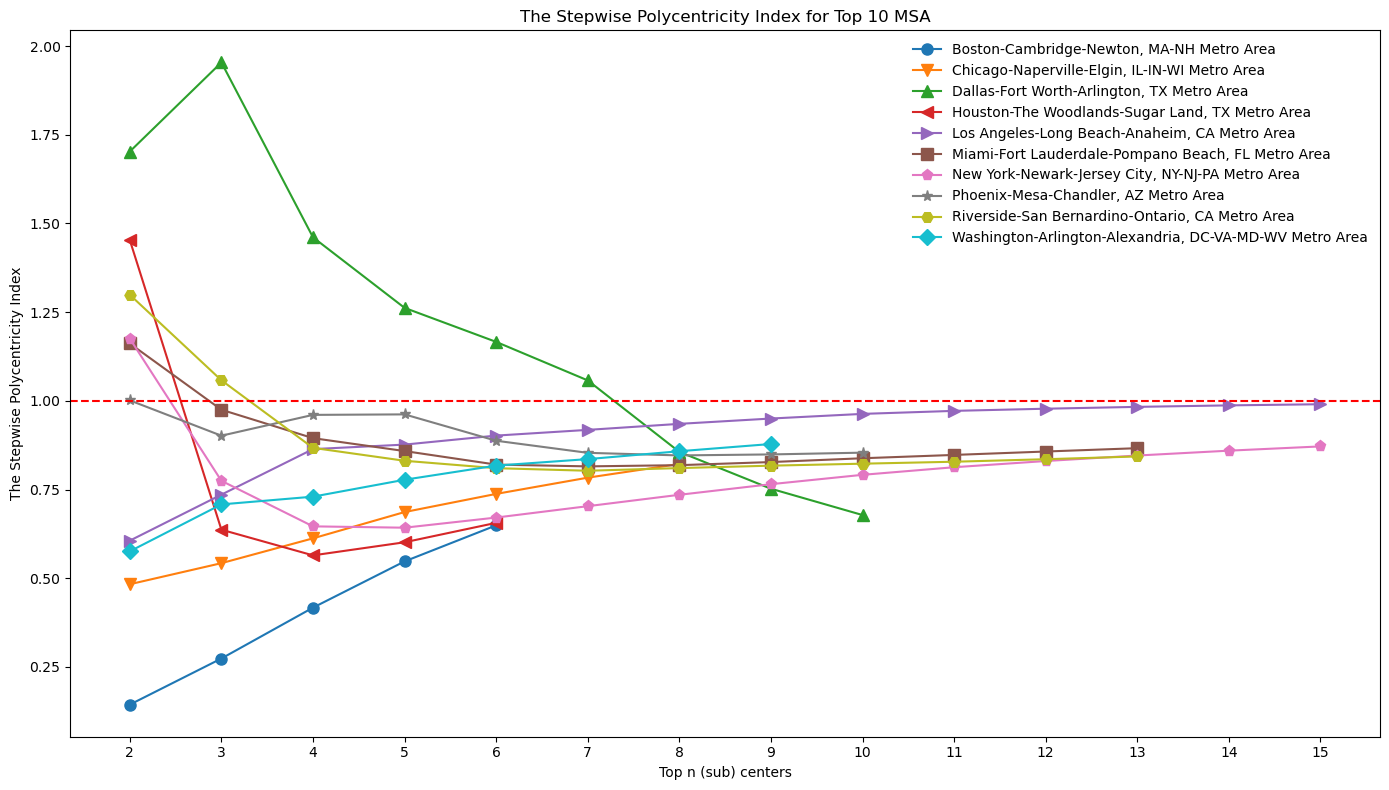

In [72]:
plt.figure(figsize=(14, 8))
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'H', 'D']

for i, row in sp_n_csa_top_5.iterrows():
    x = list(range(2, 16))
    y = row[2:].values[:14]  
    plt.plot(x, y, marker=markers[i], label=row['NAMELSAD'], linestyle='-', markersize=8)

plt.axhline(y=1, color='red', linestyle='--')

plt.title('The Stepwise Polycentricity Index for Top 10 MSA')
plt.xlabel('Top n (sub) centers')
plt.ylabel('The Stepwise Polycentricity Index')
plt.xticks(ticks=list(range(2, 16)), labels=[str(i) for i in range(2, 16)])
plt.legend(frameon=False)
plt.grid(False)

plt.tight_layout()
plt.show()

## Third Method: Rank-size distribution method

In [73]:
import statsmodels.api as sm

In [74]:
exploded_polycentric['rank'] = exploded_polycentric.groupby('NAMELSAD')['ln_tot_pop'].rank(ascending=False, method='first')

def calculate_rank_size_beta(group):
    result = {}
    
    # 1.1 Run OLS model in the whole group
    if len(group) > 1:  # determine if the group has more than one observation
        X = sm.add_constant(group['ln_tot_pop'])  # add a constant term
        model = sm.OLS(group['rank'], X).fit()
        result['beta_all'] = model.params[1]
    else:
        result['beta_all'] = np.nan
    
    # 1.2 Run OLS model of the top 2 to top 15 rankings separately
    for i in range(2, 16):
        if len(group) >= i:
            top_i = group.nlargest(i, 'ln_tot_pop')
            X_top_i = sm.add_constant(top_i['ln_tot_pop'])  
            model_top_i = sm.OLS(top_i['rank'], X_top_i).fit()
            result[f'beta_top_{i}'] = model_top_i.params[1]
        else:
            result[f'beta_top_{i}'] = np.nan
    
    # # Calculate the mean of the beta value for rankings 2, 3, and 4
    betas_2_to_4 = [result.get(f'beta_top_{i}', np.nan) for i in range(2, 5)]
    
    # ## calculate the average only if when all values of 'betas_2_','betas_3','betas_4' are not NaN
    if all(not np.isnan(value) for value in betas_2_to_4):
        result['avg_beta_2_to_4'] = np.mean(betas_2_to_4)
    else:
        result['avg_beta_2_to_4'] = np.nan
    
    return pd.Series(result)

In [75]:
# # Apply the function to each group
beta_metrics = exploded_polycentric.groupby('NAMELSAD').apply(calculate_rank_size_beta).reset_index()

In [76]:
beta_metrics

,NAMELSAD,beta_all,beta_top_2,beta_top_3,beta_top_4,beta_top_5,beta_top_6,beta_top_7,beta_top_8,beta_top_9,beta_top_10,beta_top_11,beta_top_12,beta_top_13,beta_top_14,beta_top_15,avg_beta_2_to_4
0,"Abilene, TX Metro Area",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Akron, OH Metro Area",-0.7717,-3.5648,-0.7717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Albany, GA Metro Area",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Albany-Lebanon, OR Metro Area",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Albany-Schenectady-Troy, NY Metro Area",-0.9989,-1.2912,-0.8537,-1.0547,-0.9989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,"Yakima, WA Metro Area",-0.4117,-0.4117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,"York-Hanover, PA Metro Area",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,"Youngstown-Warren-Boardman, OH-PA Metro Area",-2.4700,-0.7254,-1.0579,-1.4034,-1.7562,-2.1100,-2.4700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0623
358,"Yuba City, CA Metro Area",-0.6872,-0.6872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
beta_metrics['beta_all'].describe()

count   156.0000
mean     -1.4074
std       3.5111
min     -40.7279
25%      -1.3404
50%      -0.8435
75%      -0.4995
max      -0.2397
Name: beta_all, dtype: float64

In [78]:
beta_metrics.to_csv('beta_metrics_0.01.csv', index=False)

# Day_8_9 Using GWR model to identify the subcentricity

In [79]:
# dissolved_main_center = main_center.dissolve(by='NAMELSAD').reset_index()
# dissolved_main_center = dissolved_main_center[['NAMELSAD','geometry']]
# dissolved['center_point'] = dissolved.geometry.centroid

In [80]:
main_center = exploded_polycentric.copy()
max_density_per_group = main_center.loc[main_center.groupby('NAMELSAD')['tot_pop'].idxmax()].reset_index(drop=True)
max_density_per_group['centroid'] = max_density_per_group.geometry.centroid
max_density_per_group = gpd.GeoDataFrame(max_density_per_group.drop(columns='geometry'), geometry='centroid', crs="EPSG:3857")

In [81]:
# max_density_per_group.to_file('max_density_per_group.shp')

In [82]:
tract_center = msa_us_merge.copy()
tract_center['centroid'] = tract_center.geometry.centroid
tract_center = gpd.GeoDataFrame(tract_center.drop(columns='geometry'), geometry='centroid', crs="EPSG:3857")
tract_center = tract_center[tract_center['tot_pop'] != 0].reset_index(drop=True)
tract_center['ln_tot_pop'] = np.log(tract_center['tot_pop'])

In [83]:
merged_df = tract_center.merge(max_density_per_group[['NAMELSAD', 'centroid']], on='NAMELSAD', suffixes=('', '_msacenter'))

# calculate the distance between the tract center and the MSA center
merged_df['distance_msacenter'] = merged_df.apply(
    lambda row: row['centroid'].distance(row['centroid_msacenter']), axis=1)

tract_center = merged_df.drop(columns=['centroid_msacenter'])
tract_center['distance_msacenter'] = tract_center['distance_msacenter'] / 1609  # convert meters to miles

In [84]:
tract_center = tract_center.merge(msa_us_merge[['GEOID','geometry']], on='GEOID', how='left')
tract_center = gpd.GeoDataFrame(tract_center.drop(columns='centroid'), geometry='geometry', crs="EPSG:3857")

In [85]:
# demo = tract_center[tract_center['NAMELSAD'] == 'New York-Newark-Jersey City, NY-NJ-PA Metro Area']

# y = demo['tot_pop_density'].values.reshape((-1,1))
# X = demo[['distance_msacenter']].values

# u = demo.centroid.x
# v = demo.centroid.y
# coords = list(zip(u,v))

# gwr_selector = Sel_BW(coords, y, X)
# gwr_bw = gwr_selector.search()

# gwr_results = GWR(coords, y, X, gwr_bw).fit()

# demo['resid_0.01'] = gwr_results.resid_response
# gwr_filtered_t = gwr_results.filter_tvals(alpha = 0.01)
# demo.loc[gwr_filtered_t[:,1] == 0, 'sig_resid_0.01'] = np.nan

In [86]:
# import numpy as np
# from mgwr.gwr import GWR
# from mgwr.sel_bw import Sel_BW

# # Create a new column to store the sig_resid_0.01 results
# tract_center['resid_0.01'] = np.nan

# # Get all unique NAMELSAD values
# namelsad_values = tract_center['NAMELSAD'].unique()

# # Loop through each NAMELSAD value
# for namelsad in namelsad_values:
#     # Get the data for the current NAMELSAD group
#     demo = tract_center[tract_center['NAMELSAD'] == namelsad]
    
#     # Check if the group has more than 1 observation, if not, skip it
#     if len(demo) < 2:
#         print(f"Skipping {namelsad} because it has less than 2 observations.")
#         continue

#     # Extract y and X values
#     y = demo['tot_pop_density'].values.reshape((-1, 1))
#     X = demo[['distance_msacenter']].values

#     # Extract coordinates
#     u = demo.centroid.x
#     v = demo.centroid.y
#     coords = list(zip(u, v))

#     try:
#         # Select bandwidth and run GWR model
#         gwr_selector = gwr_selector = Sel_BW(coords, y, X, kernel='gaussian', fixed=False)   ### kernel='gaussian','bisquare','exponential'
#         gwr_bw = gwr_bw = gwr_selector.search(criterion='AIC')   ### 'AICc','AIC','BIC','CV'

#         gwr_results = GWR(coords, y, X, gwr_bw).fit()

#         # Compute significant residuals
#         demo['resid_0.01'] = gwr_results.resid_response
#         gwr_filtered_t = gwr_results.filter_tvals(alpha = 0.01)
#         demo.loc[gwr_filtered_t[:, 1] == 0, 'resid_0.01'] = np.nan

#         # Store the results back into tract_center
#         tract_center.loc[tract_center['NAMELSAD'] == namelsad, 'resid_0.01'] = demo['resid_0.01']
        
#     except ValueError as e:
#         print(f"Error processing {namelsad}: {e}")
#         continue

In [87]:
import numpy as np
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW

# Create a new column to store the sig_resid_0.01 results
tract_center['resid'] = np.nan

# Get all unique NAMELSAD values
namelsad_values = tract_center['NAMELSAD'].unique()

# Loop through each NAMELSAD value
for namelsad in namelsad_values:
    # Get the data for the current NAMELSAD group
    demo = tract_center[tract_center['NAMELSAD'] == namelsad]
    
    # Check if the group has more than 1 observation, if not, skip it
    if len(demo) < 2:
        print(f"Skipping {namelsad} because it has less than 2 observations.")
        continue

    # Extract y and X values
    y = demo['tot_pop_density'].values.reshape((-1, 1))
    X = demo[['distance_msacenter']].values

    # Extract coordinates
    u = demo.centroid.x
    v = demo.centroid.y
    coords = list(zip(u, v))

    try:
        # Select bandwidth and run GWR model
        gwr_selector = gwr_selector = Sel_BW(coords, y, X, kernel='gaussian', fixed=False)   ### kernel='gaussian','bisquare','exponential'
        gwr_bw = gwr_bw = gwr_selector.search(criterion='AICc')   ### 'AICc','AIC','BIC','CV'

        gwr_results = GWR(coords, y, X, gwr_bw).fit()

        # Compute significant residuals
        demo['resid'] = gwr_results.resid_response

        # Store the results back into tract_center
        tract_center.loc[tract_center['NAMELSAD'] == namelsad, 'resid'] = demo['resid']
        
    except ValueError as e:
        print(f"Error processing {namelsad}: {e}")
        continue

Error processing Albany, GA Metro Area: kth(=44) out of bounds (41)
Error processing Albany-Lebanon, OR Metro Area: kth(=52) out of bounds (21)
Error processing Alexandria, LA Metro Area: kth(=45) out of bounds (38)
Error processing Altoona, PA Metro Area: kth(=47) out of bounds (34)
Error processing Ames, IA Metro Area: kth(=49) out of bounds (27)
Error processing Anniston-Oxford, AL Metro Area: kth(=49) out of bounds (28)
Error processing Auburn-Opelika, AL Metro Area: kth(=49) out of bounds (27)
Error processing Battle Creek, MI Metro Area: kth(=45) out of bounds (39)
Error processing Bay City, MI Metro Area: kth(=50) out of bounds (26)
Error processing Beckley, WV Metro Area: kth(=49) out of bounds (29)
Error processing Bellingham, WA Metro Area: kth(=47) out of bounds (34)
Error processing Bend, OR Metro Area: kth(=51) out of bounds (24)
Error processing Billings, MT Metro Area: kth(=45) out of bounds (40)
Error processing Bismarck, ND Metro Area: kth(=50) out of bounds (25)
Error

In [88]:
tratract_center_na = tract_center[tract_center['resid'].notna()].reset_index(drop=True)

In [89]:
def calculate_group_sd_resid(group):
    # calculate the sd
    standard_deviation = np.std(group['resid'], ddof=1)
    group['sd_resid'] = standard_deviation
    
    # calculate the standard residual
    group['std_resid'] = group['resid'] / group['sd_resid']
    
    return group

In [90]:
tratract_center_na = tratract_center_na.groupby('NAMELSAD').apply(calculate_group_sd_resid)
tratract_center_na = tratract_center_na.reset_index(drop=True)

In [91]:
tratract_center_na

,CBSA Code,CBSA Title,Metropolitan/Micropolitan Statistical Area,County/County Equivalent,fips_couty,Central/Outlying County,CBSAFP,NAMELSAD,GEOID,ALAND,tot_pop,tot_emp,area,tot_pop_density,tot_emp_density,ln_tot_pop,distance_msacenter,geometry,resid,sd_resid,std_resid
0,10180,"Abilene, TX",Metropolitan Statistical Area,Callahan County,48059,Outlying,10180,"Abilene, TX Metro Area",48059030101,18963875.0000,4888,2031,26682428.7773,183.1917,76.1175,8.4945,19.4751,"POLYGON ((-11079150.839 3817261.386, -11079154...",63.1057,350.8967,0.1798
1,10180,"Abilene, TX",Metropolitan Statistical Area,Callahan County,48059,Outlying,10180,"Abilene, TX Metro Area",48059030200,1451473791.0000,4743,1860,2040968274.2050,2.3239,0.9113,8.4644,35.7626,"POLYGON ((-11072131.360 3822572.662, -11071932...",293.3578,350.8967,0.8360
2,10180,"Abilene, TX",Metropolitan Statistical Area,Callahan County,48059,Outlying,10180,"Abilene, TX Metro Area",48059030102,858925573.0000,4225,1960,1208533192.0315,3.4960,1.6218,8.3488,20.5411,"POLYGON ((-11090879.372 3786173.099, -11090842...",-69.0176,350.8967,-0.1967
3,10180,"Abilene, TX",Metropolitan Statistical Area,Jones County,48253,Outlying,10180,"Abilene, TX Metro Area",48253020400,352892147.0000,3178,1076,503878858.7054,6.3071,2.1354,8.0640,37.4360,"POLYGON ((-11126769.370 3878429.409, -11126705...",174.1391,350.8967,0.4963
4,10180,"Abilene, TX",Metropolitan Statistical Area,Jones County,48253,Outlying,10180,"Abilene, TX Metro Area",48253020101,221338140.0000,1320,544,329277844.3227,4.0088,1.6521,7.1854,11.4540,"POLYGON ((-11116720.363 3840051.750, -11115658...",-325.4822,350.8967,-0.9276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55568,49740,"Yuma, AZ",Metropolitan Statistical Area,Yuma County,04027,Central,49740,"Yuma, AZ Metro Area",04027000100,3987688.0000,2173,790,5706891.4863,380.7677,138.4291,7.6839,2.6100,"POLYGON ((-12759958.900 3856793.045, -12759954...",-673.0510,535.4723,-1.2569
55569,49740,"Yuma, AZ",Metropolitan Statistical Area,Yuma County,04027,Central,49740,"Yuma, AZ Metro Area",04027011106,20866897.0000,7999,2716,29522922.8674,270.9420,91.9963,8.9871,10.1591,"POLYGON ((-12751340.878 3852715.680, -12750835...",-323.2916,535.4723,-0.6038
55570,49740,"Yuma, AZ",Metropolitan Statistical Area,Yuma County,04027,Central,49740,"Yuma, AZ Metro Area",04027011501,99880762.0000,2289,788,141497457.1552,16.1770,5.5690,7.7359,10.8360,"POLYGON ((-12781056.327 3837677.777, -12780923...",-709.8742,535.4723,-1.3257
55571,49740,"Yuma, AZ",Metropolitan Statistical Area,Yuma County,04027,Central,49740,"Yuma, AZ Metro Area",04027010913,23770038.0000,1457,674,33528172.2106,43.4560,20.1025,7.2841,6.1355,"POLYGON ((-12758931.086 3858933.321, -12758200...",-771.6626,535.4723,-1.4411


In [92]:
# significant <=10 %
tract_center_na_sig_10 = tratract_center_na[tratract_center_na['std_resid'] > 1.65]
# significant <=5 %
tract_center_na_sig_5 = tratract_center_na[tratract_center_na['std_resid'] > 1.96]
# significant <=1 %
tract_center_na_sig_1 = tratract_center_na[tratract_center_na['std_resid'] > 2.576]


# tract_center_na_sig_10.to_file('tract_center_na_sig_10.shp')
# tract_center_na_sig_5.to_file('tract_center_na_sig_5.shp')
# tract_center_na_sig_1.to_file('tract_center_na_sig_1.shp')

In [93]:
# dissolved geometry in each MSA
dissolved_subcentric = tract_center_na_sig_10.dissolve(by='NAMELSAD').reset_index()
dissolved_subcentric = dissolved_subcentric[['NAMELSAD','geometry']]

# explore the multipolygon into ploygon
exploded_subcentric = dissolved_subcentric.explode(column='geometry', ignore_index=True)

# calculate the total population in each combined polygon
spatial_joined_within = gpd.sjoin(tract_center_na_sig_10, exploded_subcentric, how='inner', op='within')
total_pop_sum = spatial_joined_within.groupby('index_right')['tot_pop'].sum().reset_index()
exploded_subcentric_sig_10 = exploded_subcentric.merge(total_pop_sum, left_index=True, right_on='index_right', how='left').drop(columns='index_right')

In [94]:
# exploded_subcentric_sig_10.to_file('exploded_subcentric_sig_10.shp')

In [95]:
namels_counts = exploded_subcentric_sig_10['NAMELSAD'].value_counts()
count_distribution = namels_counts.value_counts().sort_index()
count_distribution

count
1      22
2      32
3      42
4      21
5      16
6       9
7      10
8      11
9       8
10      5
11      3
12      6
13      4
14      3
15      3
18      1
19      3
20      1
21      4
22      3
23      2
24      1
26      1
27      2
30      3
31      1
32      1
34      1
39      1
44      1
85      1
105     1
Name: count, dtype: int64

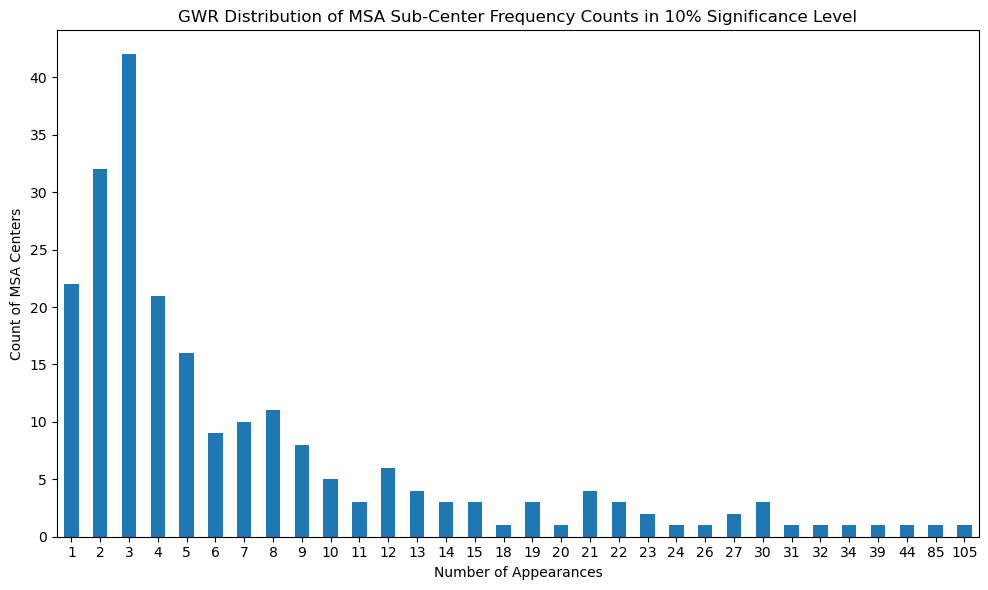

In [96]:
# create a bar plot
plt.figure(figsize=(10, 6))
count_distribution.plot(kind='bar')
plt.title('GWR Distribution of MSA Sub-Center Frequency Counts in 10% Significance Level')
plt.xlabel('Number of Appearances')
plt.ylabel('Count of MSA Centers')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [97]:
# dissolved geometry in each MSA
dissolved_subcentric = tract_center_na_sig_5.dissolve(by='NAMELSAD').reset_index()
dissolved_subcentric = dissolved_subcentric[['NAMELSAD','geometry']]

# explore the multipolygon into ploygon
exploded_subcentric = dissolved_subcentric.explode(column='geometry', ignore_index=True)

# calculate the total population in each combined polygon
spatial_joined_within = gpd.sjoin(tract_center_na_sig_5, exploded_subcentric, how='inner', op='within')
total_pop_sum = spatial_joined_within.groupby('index_right')['tot_pop'].sum().reset_index()
exploded_subcentric_sig_5 = exploded_subcentric.merge(total_pop_sum, left_index=True, right_on='index_right', how='left').drop(columns='index_right')

In [98]:
# exploded_subcentric_sig_5.to_file('exploded_subcentric_sig_5.shp')

In [99]:
namels_counts = exploded_subcentric_sig_5['NAMELSAD'].value_counts()
count_distribution = namels_counts.value_counts().sort_index()
count_distribution

count
1     38
2     39
3     45
4     17
5     12
6     12
7     10
8      5
9      9
10     4
11     4
12     2
15     6
16     4
17     1
18     1
20     1
21     2
22     2
25     1
26     2
33     1
35     1
65     1
76     1
Name: count, dtype: int64

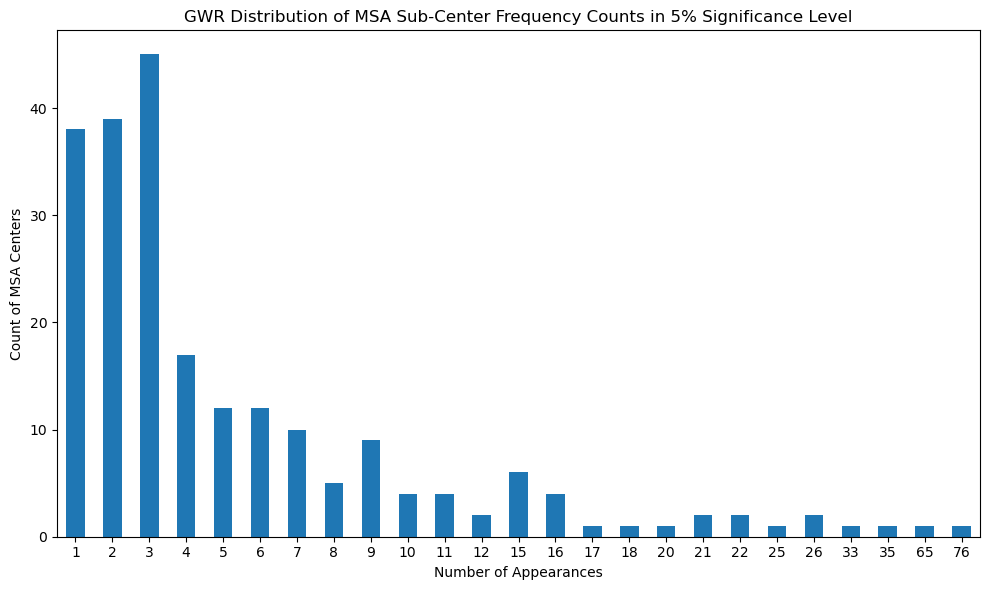

In [100]:
# create a bar plot
plt.figure(figsize=(10, 6))
count_distribution.plot(kind='bar')
plt.title('GWR Distribution of MSA Sub-Center Frequency Counts in 5% Significance Level')
plt.xlabel('Number of Appearances')
plt.ylabel('Count of MSA Centers')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [101]:
# dissolved geometry in each MSA
dissolved_subcentric = tract_center_na_sig_1.dissolve(by='NAMELSAD').reset_index()
dissolved_subcentric = dissolved_subcentric[['NAMELSAD','geometry']]

# explore the multipolygon into ploygon
exploded_subcentric = dissolved_subcentric.explode(column='geometry', ignore_index=True)

# calculate the total population in each combined polygon
spatial_joined_within = gpd.sjoin(tract_center_na_sig_1, exploded_subcentric, how='inner', op='within')
total_pop_sum = spatial_joined_within.groupby('index_right')['tot_pop'].sum().reset_index()
exploded_subcentric_sig_1 = exploded_subcentric.merge(total_pop_sum, left_index=True, right_on='index_right', how='left').drop(columns='index_right')


In [102]:
# exploded_subcentric_sig_1.to_file('exploded_subcentric_sig_1.shp')

In [103]:
namels_counts = exploded_subcentric_sig_1['NAMELSAD'].value_counts()
count_distribution = namels_counts.value_counts().sort_index()
count_distribution

count
1     87
2     49
3     15
4     12
5      8
6     11
7      3
8      2
9      2
10     1
11     3
12     1
13     2
14     1
17     3
18     1
20     1
23     1
37     1
60     1
Name: count, dtype: int64

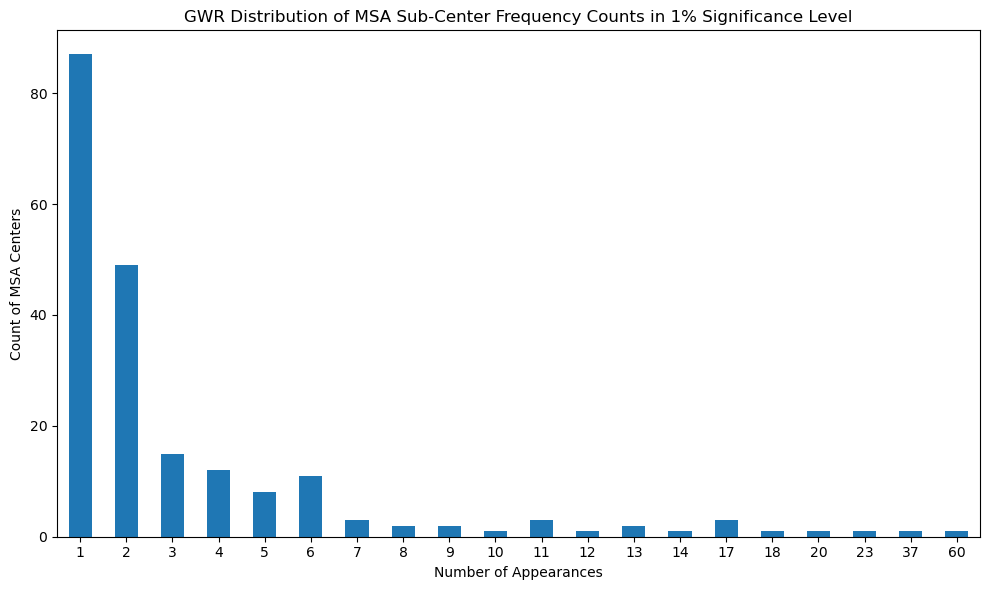

In [104]:
# create a bar plot
plt.figure(figsize=(10, 6))
count_distribution.plot(kind='bar')
plt.title('GWR Distribution of MSA Sub-Center Frequency Counts in 1% Significance Level')
plt.xlabel('Number of Appearances')
plt.ylabel('Count of MSA Centers')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

# Day_10_11_12 Combine the LISA Results and GWR Results together

In [238]:
len(exploded_subcentric_sig_10['NAMELSAD'].unique())

223

In [239]:
len(exploded_polycentric['NAMELSAD'].unique())

360

In [240]:
# create a new DataFrame to store the sp values
combined_centric_1_10 = exploded_polycentric.copy()

# get all unique NAMELSAD values in the exploded_polycentric
groups = exploded_polycentric['NAMELSAD'].unique()

for group in groups:
    # get the geometry of the current group separately
    polycentric_group = exploded_polycentric[exploded_polycentric['NAMELSAD'] == group]
    subcentric_group = exploded_subcentric_sig_10[exploded_subcentric_sig_10['NAMELSAD'] == group]
    
    # create a boolean mask to identify the subcentric polygons that are not covered by the polycentric polygons
    not_covered = subcentric_group.geometry.apply(
        lambda x: not any(polycentric_group.geometry.contains(x))
    )
    
    # get the uncovered subcentric polygons
    uncovered_geometries = subcentric_group[not_covered]
    
    # concat the uncovered subcentric polygons to the combined_centric DataFrame
    combined_centric_1_10 = pd.concat([combined_centric_1_10, uncovered_geometries], ignore_index=True)
    
# drop duplicates
combined_centric_1_10 = combined_centric_1_10.drop_duplicates()
combined_centric_1_10 = combined_centric_1_10[['NAMELSAD','geometry','tot_pop']].reset_index(drop=True)
combined_centric_1_10['area'] = combined_centric_1_10['geometry'].area
combined_centric_1_10['pop_den'] = combined_centric_1_10['tot_pop'] / combined_centric_1_10['area']
combined_centric_1_10['rank'] = combined_centric_1_10.groupby('NAMELSAD')['tot_pop'].rank(ascending=False, method='first')

In [241]:
# combined_centric_1_10.to_file('combined_centric_1_10.shp')

In [242]:
# create a new DataFrame to store the sp values
combined_centric_1_5 = exploded_polycentric.copy()

# get all unique NAMELSAD values in the exploded_polycentric
groups = exploded_polycentric['NAMELSAD'].unique()

for group in groups:
    # get the geometry of the current group separately
    polycentric_group = exploded_polycentric[exploded_polycentric['NAMELSAD'] == group]
    subcentric_group = exploded_subcentric_sig_5[exploded_subcentric_sig_5['NAMELSAD'] == group]
    
    # create a boolean mask to identify the subcentric polygons that are not covered by the polycentric polygons
    not_covered = subcentric_group.geometry.apply(
        lambda x: not any(polycentric_group.geometry.contains(x))
    )
    
    # get the uncovered subcentric polygons
    uncovered_geometries = subcentric_group[not_covered]
    
    # concat the uncovered subcentric polygons to the combined_centric DataFrame
    combined_centric_1_5 = pd.concat([combined_centric_1_5, uncovered_geometries], ignore_index=True)
    
# drop duplicates
combined_centric_1_5 = combined_centric_1_5.drop_duplicates()
combined_centric_1_5 = combined_centric_1_5[['NAMELSAD','geometry','tot_pop']].reset_index(drop=True)
combined_centric_1_5['area'] = combined_centric_1_5['geometry'].area
combined_centric_1_5['pop_den'] = combined_centric_1_5['tot_pop'] / combined_centric_1_5['area']
combined_centric_1_5['rank'] = combined_centric_1_5.groupby('NAMELSAD')['tot_pop'].rank(ascending=False, method='first')

In [243]:
# combined_centric_1_5.to_file('combined_centric_1_5.shp')

In [244]:
# create a new DataFrame to store the sp values
combined_centric_1_1 = exploded_polycentric.copy()

# get all unique NAMELSAD values in the exploded_polycentric
groups = exploded_polycentric['NAMELSAD'].unique()

for group in groups:
    # get the geometry of the current group separately
    polycentric_group = exploded_polycentric[exploded_polycentric['NAMELSAD'] == group]
    subcentric_group = exploded_subcentric_sig_1[exploded_subcentric_sig_1['NAMELSAD'] == group]
    
    # create a boolean mask to identify the subcentric polygons that are not covered by the polycentric polygons
    not_covered = subcentric_group.geometry.apply(
        lambda x: not any(polycentric_group.geometry.contains(x))
    )
    
    # get the uncovered subcentric polygons
    uncovered_geometries = subcentric_group[not_covered]
    
    # concat the uncovered subcentric polygons to the combined_centric DataFrame
    combined_centric_1_1 = pd.concat([combined_centric_1_1, uncovered_geometries], ignore_index=True)
    
# drop duplicates
combined_centric_1_1 = combined_centric_1_1.drop_duplicates()
combined_centric_1_1 = combined_centric_1_1[['NAMELSAD','geometry','tot_pop']].reset_index(drop=True)
combined_centric_1_1['area'] = combined_centric_1_1['geometry'].area
combined_centric_1_1['pop_den'] = combined_centric_1_1['tot_pop'] / combined_centric_1_1['area']
combined_centric_1_1['rank'] = combined_centric_1_1.groupby('NAMELSAD')['tot_pop'].rank(ascending=False, method='first')

In [245]:
# combined_centric_1_1.to_file('combined_centric_1_1.shp')

# Day_16_19 Polycentricity Index calculation by using the combined LISA and GWR results

## combined_centric_1_10

In [246]:
combined_centric_1_10 = combined_centric_1_10.drop(columns=['tot_pop','area','pop_den','rank'])

# calculate the total population in each combined polygon
spatial_joined_within_new = gpd.sjoin(msa_us_merge, combined_centric_1_10, how='inner', op='within')
total_pop_sum_new = spatial_joined_within_new.groupby('index_right')['tot_pop'].sum().reset_index()
combined_centric_1_10 = combined_centric_1_10.merge(total_pop_sum_new, left_index=True, right_on='index_right', how='left').drop(columns='index_right')
combined_centric_1_10 = combined_centric_1_10.dropna()
combined_centric_1_10 = combined_centric_1_10.reset_index(drop=True)
combined_centric_1_10 = combined_centric_1_10[~combined_centric_1_10['tot_pop'].isna()].reset_index(drop=True)
combined_centric_1_10['ln_tot_pop'] = np.log(combined_centric_1_10['tot_pop'])

In [247]:
combined_centric_1_10['area'] = combined_centric_1_10['geometry'].area
combined_centric_1_10['tot_pop_density'] = (combined_centric_1_10['tot_pop'] / combined_centric_1_10['area']) * 1000000  # per square km

In [248]:
print(combined_centric_1_10['NAMELSAD'].value_counts())
print('------------------')
print(combined_centric_1_10['tot_pop'].describe())

NAMELSAD
Los Angeles-Long Beach-Anaheim, CA Metro Area              92
New York-Newark-Jersey City, NY-NJ-PA Metro Area           69
Washington-Arlington-Alexandria, DC-VA-MD-WV Metro Area    38
Detroit-Warren-Dearborn, MI Metro Area                     35
Riverside-San Bernardino-Ontario, CA Metro Area            35
                                                           ..
Grand Island, NE Metro Area                                 1
Grand Forks, ND-MN Metro Area                               1
Parkersburg-Vienna, WV Metro Area                           1
Goldsboro, NC Metro Area                                    1
Abilene, TX Metro Area                                      1
Name: count, Length: 360, dtype: int64
------------------
count      1948.0000
mean      20854.4630
std       57711.2523
min         720.0000
25%        4052.7500
50%        6140.0000
75%       18473.0000
max     1639103.0000
Name: tot_pop, dtype: float64


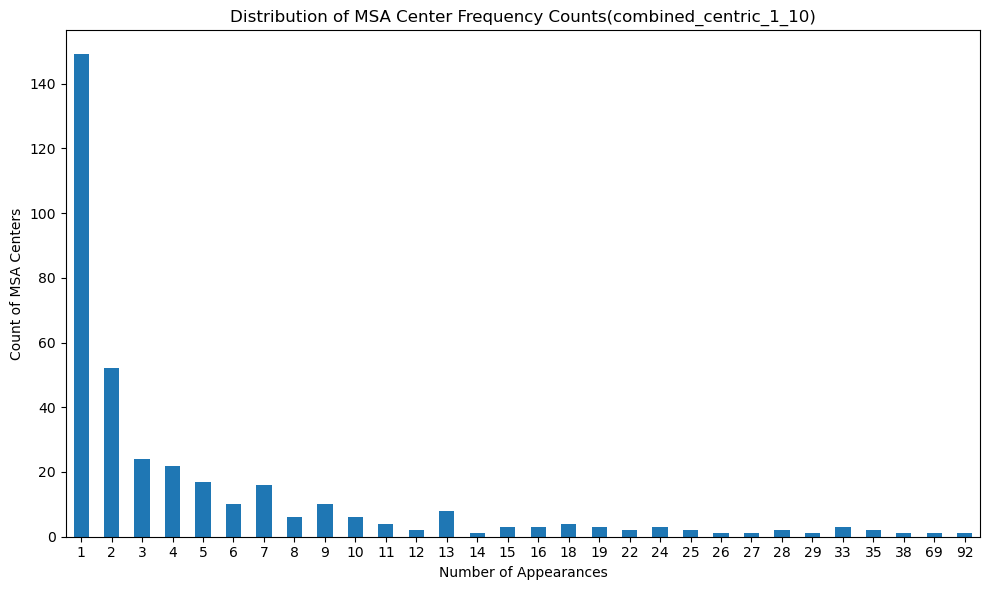

In [249]:
namelsad_counts = combined_centric_1_10['NAMELSAD'].value_counts()
count_distribution_1_10 = namelsad_counts.value_counts().sort_index()

# create a bar plot
plt.figure(figsize=(10, 6))
count_distribution_1_10.plot(kind='bar')
plt.title('Distribution of MSA Center Frequency Counts(combined_centric_1_10)')
plt.xlabel('Number of Appearances')
plt.ylabel('Count of MSA Centers')
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig('Distribution of MSA Center Frequency Counts(combined_centric_1_10).png')
plt.show()

In [250]:
combined_centric_1_10['rank'] = combined_centric_1_10.groupby('NAMELSAD')['tot_pop'].rank(ascending=False, method='first')

def calculate_sd_metrics(group):
    tot_pop = group['tot_pop']
    max_pop = tot_pop.max()
    hypothetical_sd = np.std([max_pop, 0])
    
    result = {}
    
    # 1.1 Calculate the standard deviation of all tot_pop in the group
    sd_all = np.std(tot_pop)
    result['std_dev_all'] = 1 - (sd_all / hypothetical_sd)
    
    # 1.2 Calculate the standard deviation of the top 2 to top 15 rankings separately
    for i in range(2, 16):
        if len(tot_pop) >= i:
            sd_top_i = np.std(tot_pop.nlargest(i))
            result[f'std_dev_{i}'] = 1 - (sd_top_i / hypothetical_sd)
        else:
            result[f'std_dev_{i}'] = np.nan
    
    # Calculate the mean of the standard deviations for rankings 2, 3, and 4
    ranks_2_to_4 = [result.get(f'std_dev_{i}', np.nan) for i in range(2, 5)]
    ## calculate the average only if when all values of 'std_dev_2','std_dev_3','std_dev_4' are not NaN
    if all(not np.isnan(value) for value in ranks_2_to_4):
        result['avg_std_dev_2_to_4'] = np.mean(ranks_2_to_4)
    else:
        result['avg_std_dev_2_to_4'] = np.nan
    
    return pd.Series(result)

In [251]:
# Apply the function to each group
sd_metrics_1_10 = combined_centric_1_10.groupby('NAMELSAD').apply(calculate_sd_metrics).reset_index()
sd_metrics_1_10['std_dev_all'] = sd_metrics_1_10['std_dev_all'].apply(lambda x: 0 if x == 1 else x)
sd_metrics_1_10['avg_std_dev_2_to_4'] = sd_metrics_1_10['avg_std_dev_2_to_4'].apply(lambda x: 0 if pd.isna(x) else x)

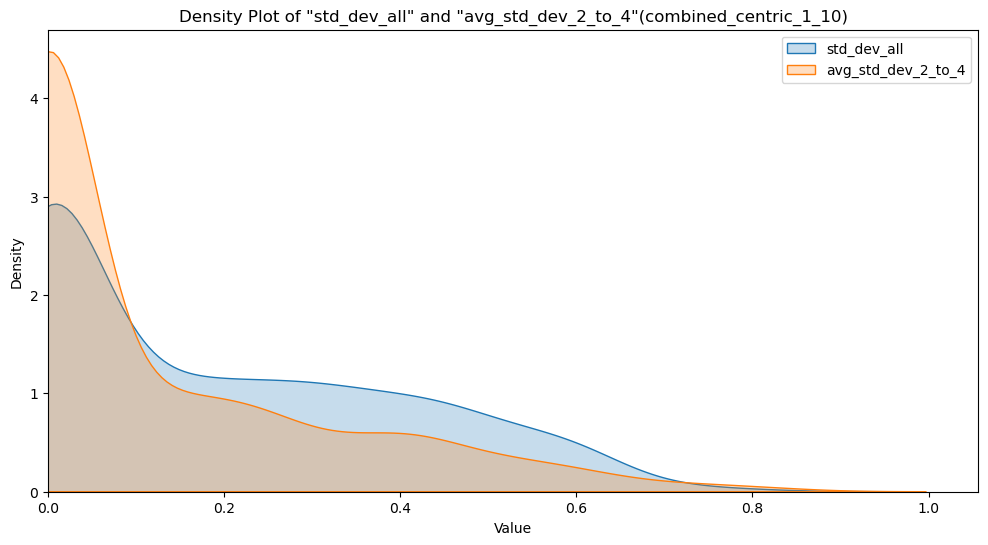

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 、setting the size of the figure
plt.figure(figsize=(12, 6))

# drawing the density figure of the std_dev_all
sns.kdeplot(sd_metrics_1_10['std_dev_all'], label='std_dev_all', fill=True)

# drawing the density figure of the avg_std_dev_2_to_4
sns.kdeplot(sd_metrics_1_10['avg_std_dev_2_to_4'], label='avg_std_dev_2_to_4', fill=True)

plt.xlim(0, None)

plt.title('Density Plot of "std_dev_all" and "avg_std_dev_2_to_4"(combined_centric_1_10)')
plt.xlabel('Value')
plt.ylabel('Density')

plt.legend()

plt.savefig('Density Plot of std_dev_all and avg_std_dev_2_to_4(combined_centric_1_10).png')
plt.show()

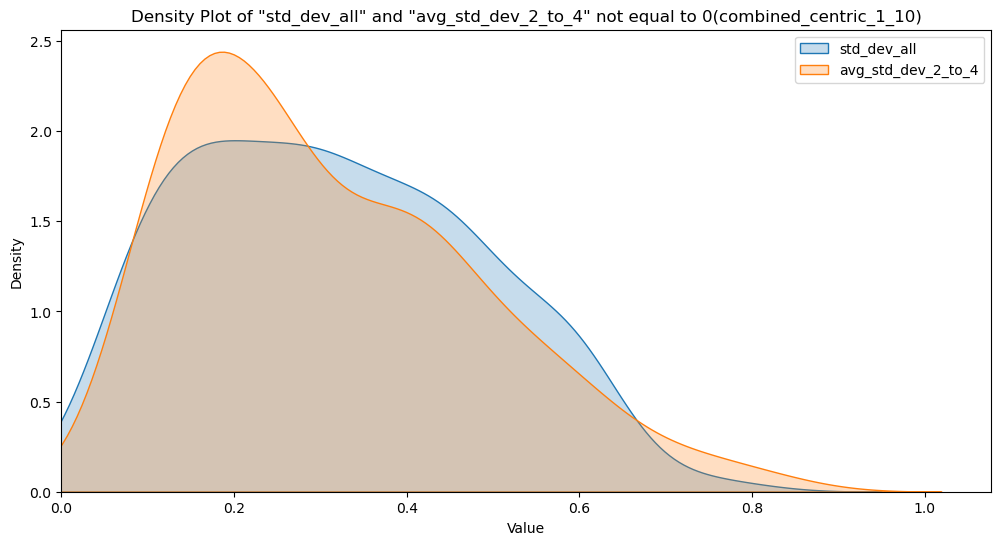

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

std_dev_all_filtered = sd_metrics_1_10[sd_metrics_1_10['std_dev_all'] != 0]['std_dev_all']

avg_std_dev_2_to_4_filtered = sd_metrics_1_10[sd_metrics_1_10['avg_std_dev_2_to_4'] != 0]['avg_std_dev_2_to_4']

sns.kdeplot(std_dev_all_filtered, label='std_dev_all', fill=True)

sns.kdeplot(avg_std_dev_2_to_4_filtered, label='avg_std_dev_2_to_4', fill=True)

plt.xlim(0, None)

plt.title('Density Plot of "std_dev_all" and "avg_std_dev_2_to_4" not equal to 0(combined_centric_1_10)')
plt.xlabel('Value')
plt.ylabel('Density')

plt.legend()

plt.savefig('Density Plot of std_dev_all and avg_std_dev_2_to_4 not equal to 0(combined_centric_1_10).png')
plt.show()

In [254]:
namelsad_counts = pd.DataFrame(namelsad_counts).reset_index()
namelsad_counts = namelsad_counts.rename(columns={'count':'count_centers'})
sd_metrics_1_10 = sd_metrics_1_10.merge(namelsad_counts, left_on='NAMELSAD', right_on='NAMELSAD', how='left')

In [255]:
sd_metrics_1_10.to_csv('sd_metrics_1_10.csv', index=False)

In [256]:
# create 'hypothetical_top' column, the pop of rank 1 is the 1. the pop of rank 2 is the 1/2, the pop of rank 3 is the 1/3, and so on
combined_centric_1_10['hypothetical_top'] = (1 / combined_centric_1_10['rank']).round(4)

In [257]:
def calculate_sd_metrics(group):
    tot_pop = group['hypothetical_top']
    max_pop = tot_pop.max()
    hypothetical_sd = np.std([max_pop, 0])
    
    result = {}
    
    # 1.1 Calculate the standard deviation of all tot_pop in the group
    sd_all = np.std(tot_pop)
    result['hy_std_dev_all'] = 1 - (sd_all / hypothetical_sd)
    
    # 1.2 Calculate the standard deviation of the top 2 to top 15 rankings separately
    for i in range(2, 16):
        if len(tot_pop) >= i:
            sd_top_i = np.std(tot_pop.nlargest(i))
            result[f'hy_std_dev_{i}'] = 1 - (sd_top_i / hypothetical_sd)
        else:
            result[f'hy_std_dev_{i}'] = np.nan
    
    # Calculate the mean of the standard deviations for rankings 2, 3, and 4
    ranks_2_to_4 = [result.get(f'hy_std_dev_{i}', np.nan) for i in range(2, 5)]
    ## calculate the average only if when all values of 'std_dev_2','std_dev_3','std_dev_4' are not NaN
    if all(not np.isnan(value) for value in ranks_2_to_4):
        result['hy_avg_std_dev_2_to_4'] = np.mean(ranks_2_to_4)
    else:
        result['hy_avg_std_dev_2_to_4'] = np.nan
    
    return pd.Series(result)

In [258]:
# Apply the function to each group
hy_sd_metrics_1_10 = combined_centric_1_10.groupby('NAMELSAD').apply(calculate_sd_metrics).reset_index()
hy_sd_metrics_1_10['hy_std_dev_all'] = hy_sd_metrics_1_10['hy_std_dev_all'].apply(lambda x: 0 if x == 1 else x)
hy_sd_metrics_1_10['hy_avg_std_dev_2_to_4'] = hy_sd_metrics_1_10['hy_avg_std_dev_2_to_4'].apply(lambda x: 0 if pd.isna(x) else x)

In [259]:
hy_sd_metrics_1_10

,NAMELSAD,hy_std_dev_all,hy_std_dev_2,hy_std_dev_3,hy_std_dev_4,hy_std_dev_5,hy_std_dev_6,hy_std_dev_7,hy_std_dev_8,hy_std_dev_9,hy_std_dev_10,hy_std_dev_11,hy_std_dev_12,hy_std_dev_13,hy_std_dev_14,hy_std_dev_15,hy_avg_std_dev_2_to_4
0,"Abilene, TX Metro Area",0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
1,"Akron, OH Metro Area",0.4623,0.5000,0.4334,0.4181,0.4197,0.4279,0.4387,0.4504,0.4623,NaN,NaN,NaN,NaN,NaN,NaN,0.4505
2,"Albany, GA Metro Area",0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
3,"Albany-Lebanon, OR Metro Area",0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
4,"Albany-Schenectady-Troy, NY Metro Area",0.4623,0.5000,0.4334,0.4181,0.4197,0.4279,0.4387,0.4504,0.4623,NaN,NaN,NaN,NaN,NaN,NaN,0.4505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,"Yakima, WA Metro Area",0.5000,0.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
356,"York-Hanover, PA Metro Area",0.5000,0.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
357,"Youngstown-Warren-Boardman, OH-PA Metro Area",0.5061,0.5000,0.4334,0.4181,0.4197,0.4279,0.4387,0.4504,0.4623,0.4739,0.4851,0.4959,0.5061,NaN,NaN,0.4505
358,"Yuba City, CA Metro Area",0.5000,0.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000


In [260]:
sd_metrics_1_10

,NAMELSAD,std_dev_all,std_dev_2,std_dev_3,std_dev_4,std_dev_5,std_dev_6,std_dev_7,std_dev_8,std_dev_9,std_dev_10,std_dev_11,std_dev_12,std_dev_13,std_dev_14,std_dev_15,avg_std_dev_2_to_4,count_centers
0,"Abilene, TX Metro Area",0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,1
1,"Akron, OH Metro Area",0.3311,0.7554,0.3020,0.2414,0.2450,0.2657,0.2900,0.3126,0.3311,NaN,NaN,NaN,NaN,NaN,NaN,0.4329,9
2,"Albany, GA Metro Area",0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,1
3,"Albany-Lebanon, OR Metro Area",0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,1
4,"Albany-Schenectady-Troy, NY Metro Area",0.3895,0.4610,0.2908,0.2816,0.3027,0.3288,0.3489,0.3696,0.3895,NaN,NaN,NaN,NaN,NaN,NaN,0.3445,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,"Yakima, WA Metro Area",0.0882,0.0882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,2
356,"York-Hanover, PA Metro Area",0.0758,0.0758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,2
357,"Youngstown-Warren-Boardman, OH-PA Metro Area",0.5264,0.2520,0.2929,0.3333,0.3716,0.4071,0.4321,0.4547,0.4738,0.4887,0.5025,0.5153,0.5264,NaN,NaN,0.2927,13
358,"Yuba City, CA Metro Area",0.2333,0.2333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,2


In [261]:
sd_metrics_1_10

,NAMELSAD,std_dev_all,std_dev_2,std_dev_3,std_dev_4,std_dev_5,std_dev_6,std_dev_7,std_dev_8,std_dev_9,std_dev_10,std_dev_11,std_dev_12,std_dev_13,std_dev_14,std_dev_15,avg_std_dev_2_to_4,count_centers
0,"Abilene, TX Metro Area",0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,1
1,"Akron, OH Metro Area",0.3311,0.7554,0.3020,0.2414,0.2450,0.2657,0.2900,0.3126,0.3311,NaN,NaN,NaN,NaN,NaN,NaN,0.4329,9
2,"Albany, GA Metro Area",0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,1
3,"Albany-Lebanon, OR Metro Area",0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,1
4,"Albany-Schenectady-Troy, NY Metro Area",0.3895,0.4610,0.2908,0.2816,0.3027,0.3288,0.3489,0.3696,0.3895,NaN,NaN,NaN,NaN,NaN,NaN,0.3445,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,"Yakima, WA Metro Area",0.0882,0.0882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,2
356,"York-Hanover, PA Metro Area",0.0758,0.0758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,2
357,"Youngstown-Warren-Boardman, OH-PA Metro Area",0.5264,0.2520,0.2929,0.3333,0.3716,0.4071,0.4321,0.4547,0.4738,0.4887,0.5025,0.5153,0.5264,NaN,NaN,0.2927,13
358,"Yuba City, CA Metro Area",0.2333,0.2333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,2


In [262]:
sd_metrics_1_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NAMELSAD            360 non-null    object 
 1   std_dev_all         360 non-null    float64
 2   std_dev_2           211 non-null    float64
 3   std_dev_3           159 non-null    float64
 4   std_dev_4           135 non-null    float64
 5   std_dev_5           113 non-null    float64
 6   std_dev_6           96 non-null     float64
 7   std_dev_7           86 non-null     float64
 8   std_dev_8           70 non-null     float64
 9   std_dev_9           64 non-null     float64
 10  std_dev_10          54 non-null     float64
 11  std_dev_11          48 non-null     float64
 12  std_dev_12          44 non-null     float64
 13  std_dev_13          42 non-null     float64
 14  std_dev_14          34 non-null     float64
 15  std_dev_15          33 non-null     float64
 16  avg_std_

In [263]:
hy_sd_metrics_1_10.columns = hy_sd_metrics_1_10.columns.str.replace('hy_', '')

# create a new DataFrame to store the sp values
sp_n_1_10 = pd.DataFrame()

for column in sd_metrics_1_10.columns:
    if column not in ['NAMELSAD', 'count_centers']:

        denominator = hy_sd_metrics_1_10[column].replace(0, np.nan)
        sp_n_1_10[column] = sd_metrics_1_10[column] / denominator
        sp_n_1_10[column] = sp_n_1_10[column].round(4)
    else:
        sp_n_1_10[column] = sd_metrics_1_10[column]

In [264]:
sp_n_1_10 = sp_n_1_10.merge(namelsad_counts, left_on='NAMELSAD', right_on='NAMELSAD', how='left')

In [265]:
sp_n_1_10.to_csv('stepwise_sp_values_1_10.csv', index=False)

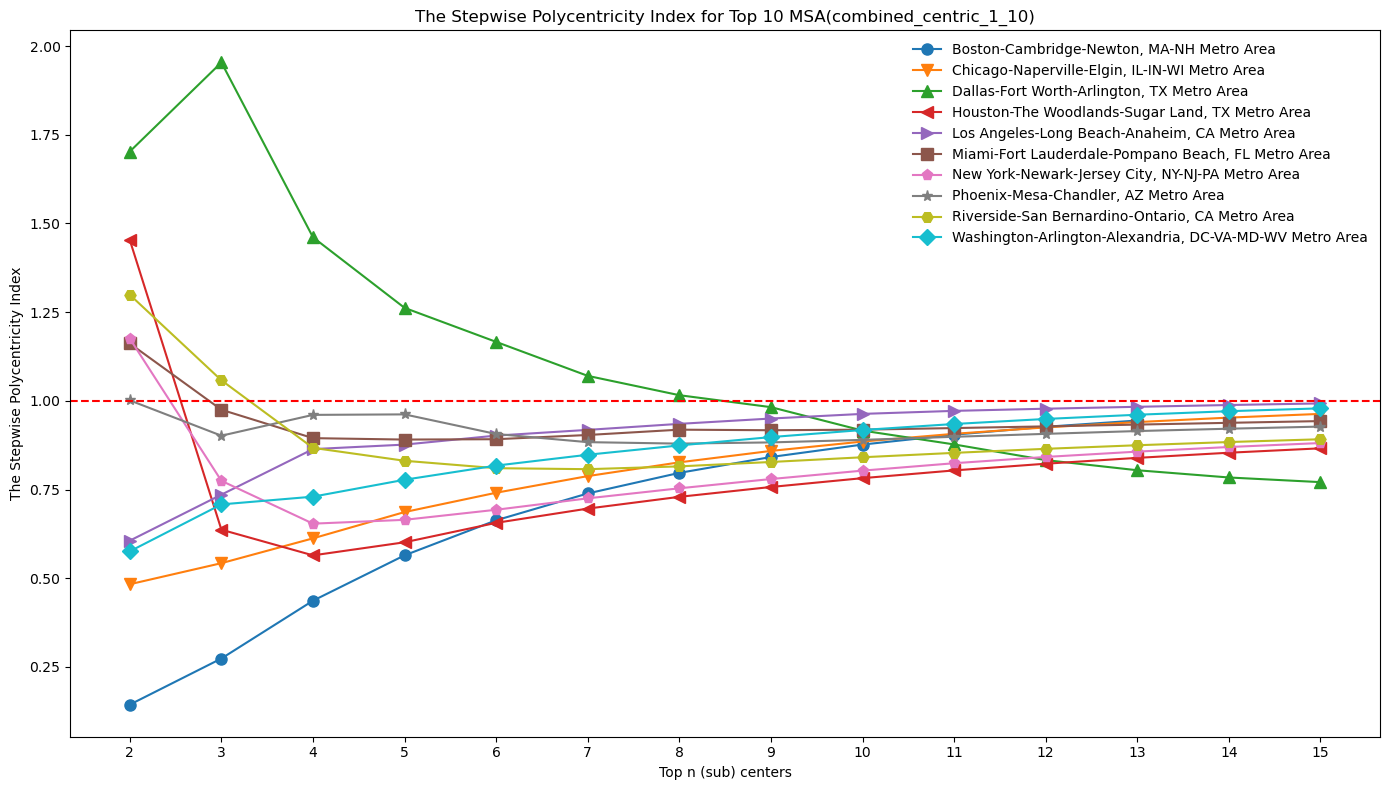

In [266]:
msa_top_10 = ['New York-Newark-Jersey City, NY-NJ-PA Metro Area',
              'Los Angeles-Long Beach-Anaheim, CA Metro Area',
              'Chicago-Naperville-Elgin, IL-IN-WI Metro Area',
              'Dallas-Fort Worth-Arlington, TX Metro Area',
              'Houston-The Woodlands-Sugar Land, TX Metro Area',
              'Washington-Arlington-Alexandria, DC-VA-MD-WV Metro Area',
              'Miami-Fort Lauderdale-Pompano Beach, FL Metro Area',
              'Phoenix-Mesa-Chandler, AZ Metro Area',
              'Boston-Cambridge-Newton, MA-NH Metro Area',
              'Riverside-San Bernardino-Ontario, CA Metro Area']

sp_n_csa_top_5 = sp_n_1_10[sp_n_1_10['NAMELSAD'].isin(msa_top_10)].reset_index(drop=True)


plt.figure(figsize=(14, 8))
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'H', 'D']

for i, row in sp_n_csa_top_5.iterrows():
    x = list(range(2, 16))
    y = row[2:].values[:14]  
    plt.plot(x, y, marker=markers[i], label=row['NAMELSAD'], linestyle='-', markersize=8)

plt.axhline(y=1, color='red', linestyle='--')

plt.title('The Stepwise Polycentricity Index for Top 10 MSA(combined_centric_1_10)')
plt.xlabel('Top n (sub) centers')
plt.ylabel('The Stepwise Polycentricity Index')
plt.xticks(ticks=list(range(2, 16)), labels=[str(i) for i in range(2, 16)])
plt.legend(frameon=False)
plt.grid(False)

plt.tight_layout()

plt.savefig('The Stepwise Polycentricity Index for Top 10 MSA(combined_centric_1_10).png')
plt.show()

In [267]:
import statsmodels.api as sm

combined_centric_1_10['rank'] = combined_centric_1_10.groupby('NAMELSAD')['ln_tot_pop'].rank(ascending=False, method='first')

def calculate_rank_size_beta(group):
    result = {}
    
    # 1.1 Run OLS model in the whole group
    if len(group) > 1:  # determine if the group has more than one observation
        X = sm.add_constant(group['ln_tot_pop'])  # add a constant term
        model = sm.OLS(group['rank'], X).fit()
        result['beta_all'] = model.params[1]
    else:
        result['beta_all'] = np.nan
    
    # 1.2 Run OLS model of the top 2 to top 15 rankings separately
    for i in range(2, 16):
        if len(group) >= i:
            top_i = group.nlargest(i, 'ln_tot_pop')
            X_top_i = sm.add_constant(top_i['ln_tot_pop'])  
            model_top_i = sm.OLS(top_i['rank'], X_top_i).fit()
            result[f'beta_top_{i}'] = model_top_i.params[1]
        else:
            result[f'beta_top_{i}'] = np.nan
    
    # # Calculate the mean of the beta value for rankings 2, 3, and 4
    betas_2_to_4 = [result.get(f'beta_top_{i}', np.nan) for i in range(2, 5)]
    
    # ## calculate the average only if when all values of 'betas_2_','betas_3','betas_4' are not NaN
    if all(not np.isnan(value) for value in betas_2_to_4):
        result['avg_beta_2_to_4'] = np.mean(betas_2_to_4)
    else:
        result['avg_beta_2_to_4'] = np.nan
    
    return pd.Series(result)

In [268]:
# # Apply the function to each group
beta_metrics_1_10 = combined_centric_1_10.groupby('NAMELSAD').apply(calculate_rank_size_beta).reset_index()

In [269]:
beta_metrics_1_10 = beta_metrics_1_10.merge(namelsad_counts, left_on='NAMELSAD', right_on='NAMELSAD', how='left')

In [270]:
beta_metrics_1_10.to_csv('beta_metrics_1_10.csv', index=False)

## combined_centric_1_5

In [271]:
combined_centric_1_5 = combined_centric_1_5.drop(columns=['tot_pop','area','pop_den','rank'])

# calculate the total population in each combined polygon
spatial_joined_within_new = gpd.sjoin(msa_us_merge, combined_centric_1_5, how='inner', op='within')
total_pop_sum_new = spatial_joined_within_new.groupby('index_right')['tot_pop'].sum().reset_index()
combined_centric_1_5 = combined_centric_1_5.merge(total_pop_sum_new, left_index=True, right_on='index_right', how='left').drop(columns='index_right')
combined_centric_1_5 = combined_centric_1_5.dropna()
combined_centric_1_5 = combined_centric_1_5.reset_index(drop=True)
combined_centric_1_5 = combined_centric_1_5[~combined_centric_1_5['tot_pop'].isna()].reset_index(drop=True)
combined_centric_1_5['ln_tot_pop'] = np.log(combined_centric_1_5['tot_pop'])

In [272]:
combined_centric_1_5['area'] = combined_centric_1_5['geometry'].area
combined_centric_1_5['tot_pop_density'] = (combined_centric_1_5['tot_pop'] / combined_centric_1_5['area']) * 1000000  # per square km

In [273]:
print(combined_centric_1_5['NAMELSAD'].value_counts())
print('------------------')
print(combined_centric_1_5['tot_pop'].describe())

NAMELSAD
Los Angeles-Long Beach-Anaheim, CA Metro Area              70
New York-Newark-Jersey City, NY-NJ-PA Metro Area           49
Riverside-San Bernardino-Ontario, CA Metro Area            33
Washington-Arlington-Alexandria, DC-VA-MD-WV Metro Area    32
Detroit-Warren-Dearborn, MI Metro Area                     29
                                                           ..
Gainesville, GA Metro Area                                  1
Gadsden, AL Metro Area                                      1
Oshkosh-Neenah, WI Metro Area                               1
Owensboro, KY Metro Area                                    1
Abilene, TX Metro Area                                      1
Name: count, Length: 360, dtype: int64
------------------
count      1581.0000
mean      24157.3991
std       63567.0324
min         720.0000
25%        4161.0000
50%        6529.0000
75%       27472.0000
max     1639103.0000
Name: tot_pop, dtype: float64


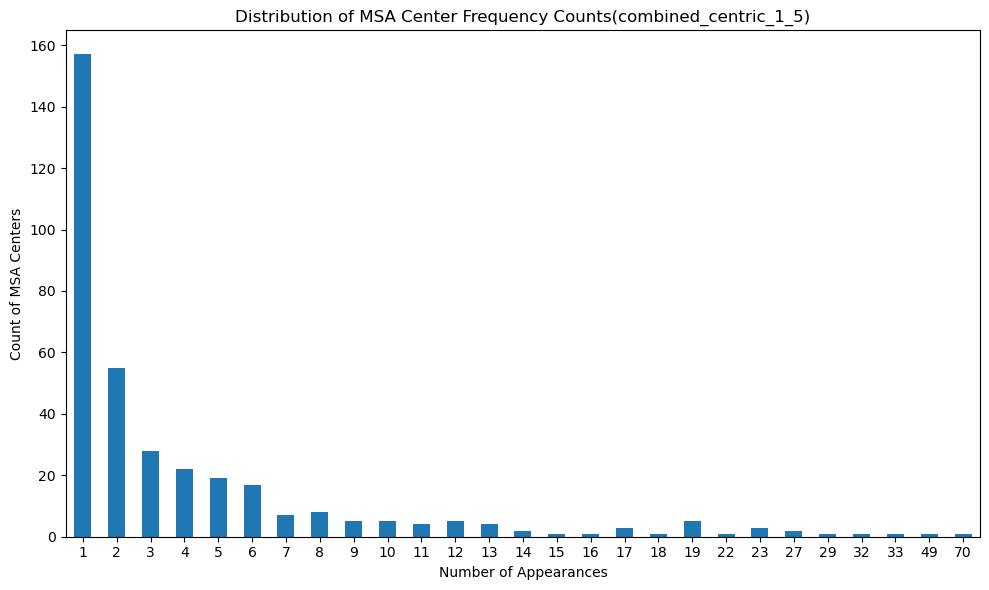

In [274]:
namelsad_counts = combined_centric_1_5['NAMELSAD'].value_counts()
count_distribution_1_5 = namelsad_counts.value_counts().sort_index()

# create a bar plot
plt.figure(figsize=(10, 6))
count_distribution_1_5.plot(kind='bar')
plt.title('Distribution of MSA Center Frequency Counts(combined_centric_1_5)')
plt.xlabel('Number of Appearances')
plt.ylabel('Count of MSA Centers')
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig('Distribution of MSA Center Frequency Counts(combined_centric_1_5).png')
plt.show()

In [275]:
combined_centric_1_5['rank'] = combined_centric_1_5.groupby('NAMELSAD')['tot_pop'].rank(ascending=False, method='first')

def calculate_sd_metrics(group):
    tot_pop = group['tot_pop']
    max_pop = tot_pop.max()
    hypothetical_sd = np.std([max_pop, 0])
    
    result = {}
    
    # 1.1 Calculate the standard deviation of all tot_pop in the group
    sd_all = np.std(tot_pop)
    result['std_dev_all'] = 1 - (sd_all / hypothetical_sd)
    
    # 1.2 Calculate the standard deviation of the top 2 to top 15 rankings separately
    for i in range(2, 16):
        if len(tot_pop) >= i:
            sd_top_i = np.std(tot_pop.nlargest(i))
            result[f'std_dev_{i}'] = 1 - (sd_top_i / hypothetical_sd)
        else:
            result[f'std_dev_{i}'] = np.nan
    
    # Calculate the mean of the standard deviations for rankings 2, 3, and 4
    ranks_2_to_4 = [result.get(f'std_dev_{i}', np.nan) for i in range(2, 5)]
    ## calculate the average only if when all values of 'std_dev_2','std_dev_3','std_dev_4' are not NaN
    if all(not np.isnan(value) for value in ranks_2_to_4):
        result['avg_std_dev_2_to_4'] = np.mean(ranks_2_to_4)
    else:
        result['avg_std_dev_2_to_4'] = np.nan
    
    return pd.Series(result)

In [276]:
# Apply the function to each group
sd_metrics_1_5 = combined_centric_1_5.groupby('NAMELSAD').apply(calculate_sd_metrics).reset_index()
sd_metrics_1_5['std_dev_all'] = sd_metrics_1_5['std_dev_all'].apply(lambda x: 0 if x == 1 else x)
sd_metrics_1_5['avg_std_dev_2_to_4'] = sd_metrics_1_5['avg_std_dev_2_to_4'].apply(lambda x: 0 if pd.isna(x) else x)

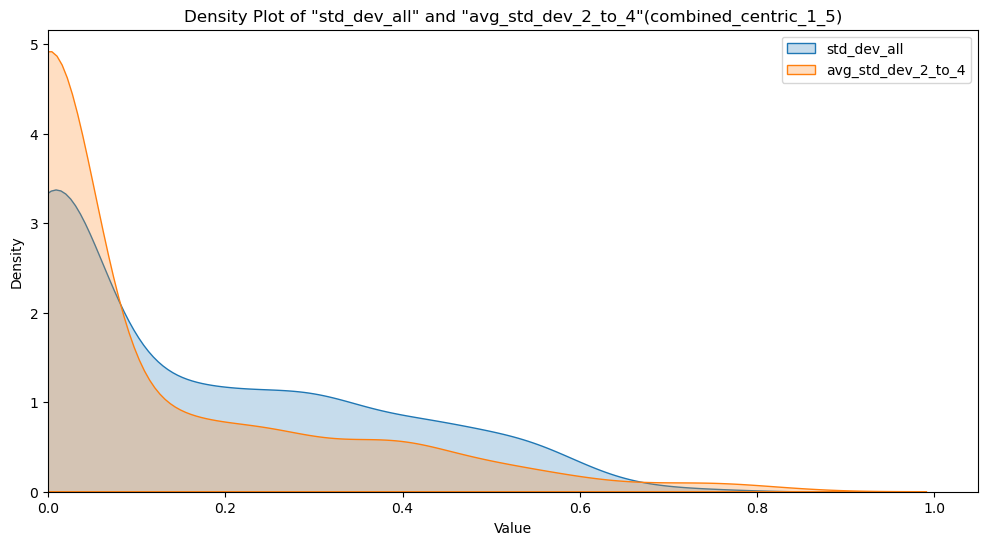

In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 、setting the size of the figure
plt.figure(figsize=(12, 6))

# drawing the density figure of the std_dev_all
sns.kdeplot(sd_metrics_1_5['std_dev_all'], label='std_dev_all', fill=True)

# drawing the density figure of the avg_std_dev_2_to_4
sns.kdeplot(sd_metrics_1_5['avg_std_dev_2_to_4'], label='avg_std_dev_2_to_4', fill=True)

plt.xlim(0, None)

plt.title('Density Plot of "std_dev_all" and "avg_std_dev_2_to_4"(combined_centric_1_5)')
plt.xlabel('Value')
plt.ylabel('Density')

plt.legend()

plt.savefig('Density Plot of std_dev_all and avg_std_dev_2_to_4(combined_centric_1_5).png')
plt.show()

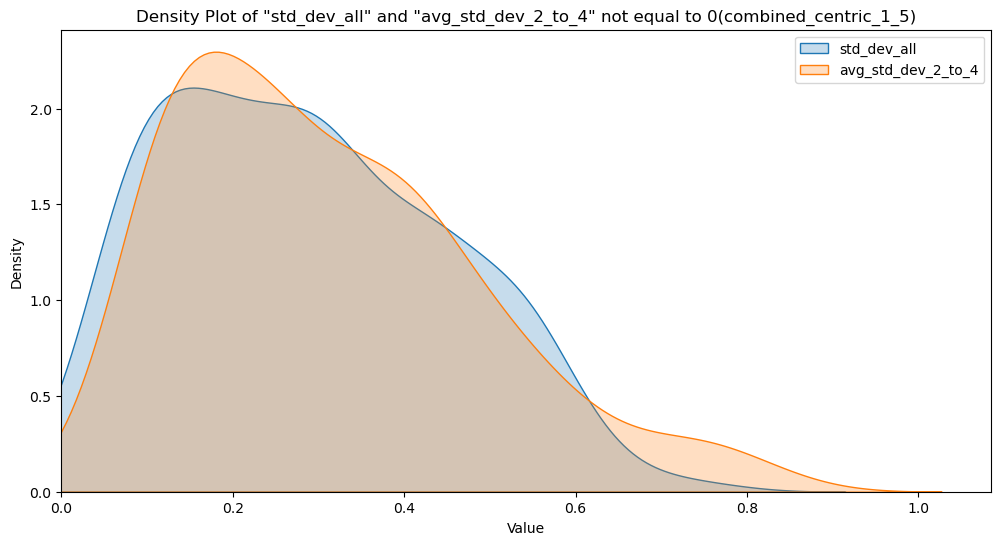

In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

std_dev_all_filtered = sd_metrics_1_5[sd_metrics_1_5['std_dev_all'] != 0]['std_dev_all']

avg_std_dev_2_to_4_filtered = sd_metrics_1_5[sd_metrics_1_5['avg_std_dev_2_to_4'] != 0]['avg_std_dev_2_to_4']

sns.kdeplot(std_dev_all_filtered, label='std_dev_all', fill=True)

sns.kdeplot(avg_std_dev_2_to_4_filtered, label='avg_std_dev_2_to_4', fill=True)

plt.xlim(0, None)

plt.title('Density Plot of "std_dev_all" and "avg_std_dev_2_to_4" not equal to 0(combined_centric_1_5)')
plt.xlabel('Value')
plt.ylabel('Density')

plt.legend()

plt.savefig('Density Plot of std_dev_all and avg_std_dev_2_to_4 not equal to 0(combined_centric_1_5).png')
plt.show()

In [279]:
namelsad_counts = pd.DataFrame(namelsad_counts).reset_index()
namelsad_counts = namelsad_counts.rename(columns={'count':'count_centers'})
sd_metrics_1_5 = sd_metrics_1_5.merge(namelsad_counts, left_on='NAMELSAD', right_on='NAMELSAD', how='left')

In [280]:
sd_metrics_1_5.to_csv('sd_metrics_1_5.csv', index=False)

In [281]:
# create 'hypothetical_top' column, the pop of rank 1 is the 1. the pop of rank 2 is the 1/2, the pop of rank 3 is the 1/3, and so on
combined_centric_1_5['hypothetical_top'] = (1 / combined_centric_1_5['rank']).round(4)

In [282]:
def calculate_sd_metrics(group):
    tot_pop = group['hypothetical_top']
    max_pop = tot_pop.max()
    hypothetical_sd = np.std([max_pop, 0])
    
    result = {}
    
    # 1.1 Calculate the standard deviation of all tot_pop in the group
    sd_all = np.std(tot_pop)
    result['hy_std_dev_all'] = 1 - (sd_all / hypothetical_sd)
    
    # 1.2 Calculate the standard deviation of the top 2 to top 15 rankings separately
    for i in range(2, 16):
        if len(tot_pop) >= i:
            sd_top_i = np.std(tot_pop.nlargest(i))
            result[f'hy_std_dev_{i}'] = 1 - (sd_top_i / hypothetical_sd)
        else:
            result[f'hy_std_dev_{i}'] = np.nan
    
    # Calculate the mean of the standard deviations for rankings 2, 3, and 4
    ranks_2_to_4 = [result.get(f'hy_std_dev_{i}', np.nan) for i in range(2, 5)]
    ## calculate the average only if when all values of 'std_dev_2','std_dev_3','std_dev_4' are not NaN
    if all(not np.isnan(value) for value in ranks_2_to_4):
        result['hy_avg_std_dev_2_to_4'] = np.mean(ranks_2_to_4)
    else:
        result['hy_avg_std_dev_2_to_4'] = np.nan
    
    return pd.Series(result)

In [283]:
# Apply the function to each group
hy_sd_metrics_1_5 = combined_centric_1_5.groupby('NAMELSAD').apply(calculate_sd_metrics).reset_index()
hy_sd_metrics_1_5['hy_std_dev_all'] = hy_sd_metrics_1_5['hy_std_dev_all'].apply(lambda x: 0 if x == 1 else x)
hy_sd_metrics_1_5['hy_avg_std_dev_2_to_4'] = hy_sd_metrics_1_5['hy_avg_std_dev_2_to_4'].apply(lambda x: 0 if pd.isna(x) else x)

In [284]:
hy_sd_metrics_1_5.columns = hy_sd_metrics_1_5.columns.str.replace('hy_', '')

# create a new DataFrame to store the sp values
sp_n_1_5 = pd.DataFrame()

for column in sd_metrics_1_5.columns:
    if column not in ['NAMELSAD', 'count_centers']:

        denominator = hy_sd_metrics_1_5[column].replace(0, np.nan)
        sp_n_1_5[column] = sd_metrics_1_5[column] / denominator
        sp_n_1_5[column] = sp_n_1_5[column].round(4)
    else:
        sp_n_1_5[column] = sd_metrics_1_5[column]

In [285]:
sp_n_1_5 = sp_n_1_5.merge(namelsad_counts, left_on='NAMELSAD', right_on='NAMELSAD', how='left')

In [286]:
sp_n_1_5.to_csv('stepwise_sp_values_1_5.csv', index=False)

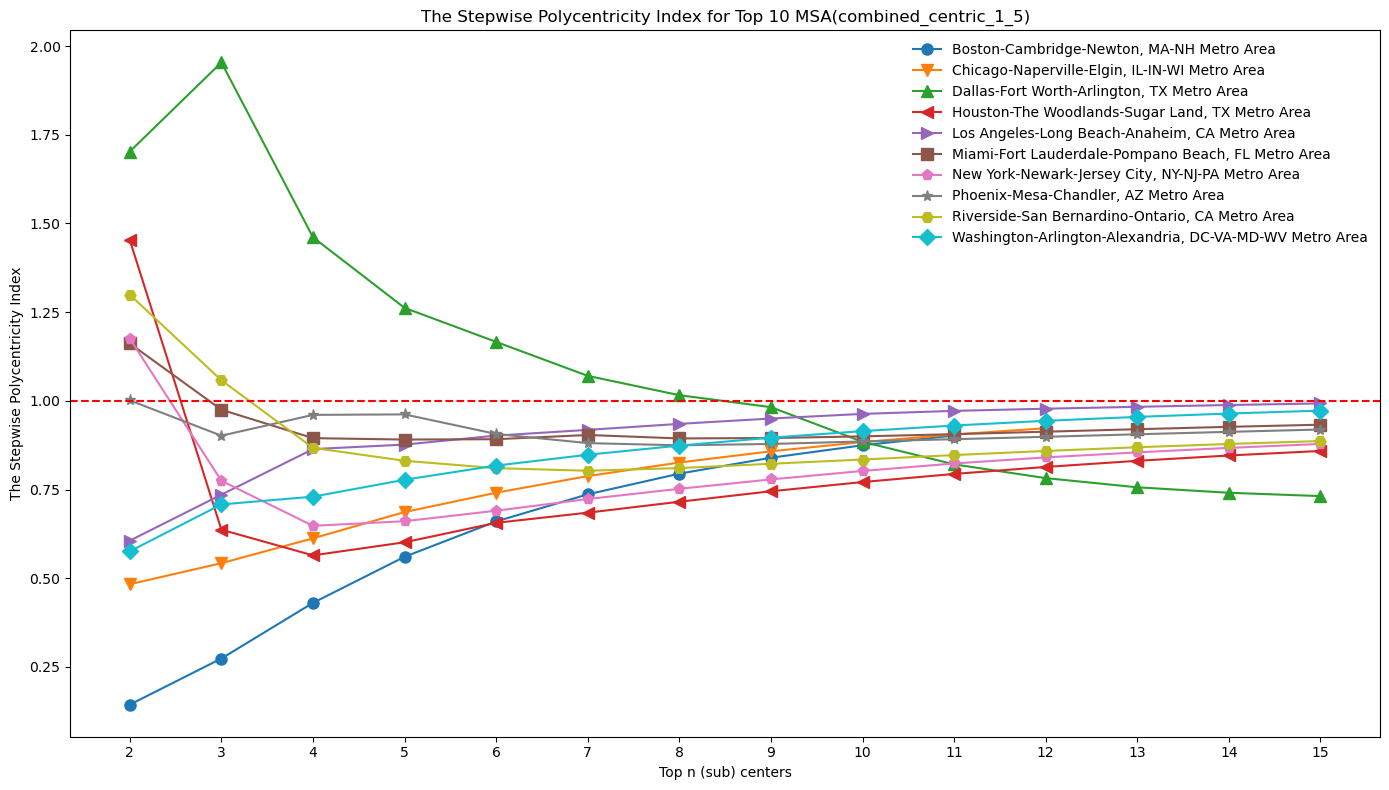

In [287]:
msa_top_10 = ['New York-Newark-Jersey City, NY-NJ-PA Metro Area',
              'Los Angeles-Long Beach-Anaheim, CA Metro Area',
              'Chicago-Naperville-Elgin, IL-IN-WI Metro Area',
              'Dallas-Fort Worth-Arlington, TX Metro Area',
              'Houston-The Woodlands-Sugar Land, TX Metro Area',
              'Washington-Arlington-Alexandria, DC-VA-MD-WV Metro Area',
              'Miami-Fort Lauderdale-Pompano Beach, FL Metro Area',
              'Phoenix-Mesa-Chandler, AZ Metro Area',
              'Boston-Cambridge-Newton, MA-NH Metro Area',
              'Riverside-San Bernardino-Ontario, CA Metro Area']

sp_n_csa_top_5 = sp_n_1_5[sp_n_1_5['NAMELSAD'].isin(msa_top_10)].reset_index(drop=True)


plt.figure(figsize=(14, 8))
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'H', 'D']

for i, row in sp_n_csa_top_5.iterrows():
    x = list(range(2, 16))
    y = row[2:].values[:14]  
    plt.plot(x, y, marker=markers[i], label=row['NAMELSAD'], linestyle='-', markersize=8)

plt.axhline(y=1, color='red', linestyle='--')

plt.title('The Stepwise Polycentricity Index for Top 10 MSA(combined_centric_1_5)')
plt.xlabel('Top n (sub) centers')
plt.ylabel('The Stepwise Polycentricity Index')
plt.xticks(ticks=list(range(2, 16)), labels=[str(i) for i in range(2, 16)])
plt.legend(frameon=False)
plt.grid(False)

plt.tight_layout()

plt.savefig('The Stepwise Polycentricity Index for Top 10 MSA(combined_centric_1_5).png')
plt.show()

In [288]:
import statsmodels.api as sm

combined_centric_1_5['rank'] = combined_centric_1_5.groupby('NAMELSAD')['ln_tot_pop'].rank(ascending=False, method='first')

def calculate_rank_size_beta(group):
    result = {}
    
    # 1.1 Run OLS model in the whole group
    if len(group) > 1:  # determine if the group has more than one observation
        X = sm.add_constant(group['ln_tot_pop'])  # add a constant term
        model = sm.OLS(group['rank'], X).fit()
        result['beta_all'] = model.params[1]
    else:
        result['beta_all'] = np.nan
    
    # 1.2 Run OLS model of the top 2 to top 15 rankings separately
    for i in range(2, 16):
        if len(group) >= i:
            top_i = group.nlargest(i, 'ln_tot_pop')
            X_top_i = sm.add_constant(top_i['ln_tot_pop'])  
            model_top_i = sm.OLS(top_i['rank'], X_top_i).fit()
            result[f'beta_top_{i}'] = model_top_i.params[1]
        else:
            result[f'beta_top_{i}'] = np.nan
    
    # # Calculate the mean of the beta value for rankings 2, 3, and 4
    betas_2_to_4 = [result.get(f'beta_top_{i}', np.nan) for i in range(2, 5)]
    
    # ## calculate the average only if when all values of 'betas_2_','betas_3','betas_4' are not NaN
    if all(not np.isnan(value) for value in betas_2_to_4):
        result['avg_beta_2_to_4'] = np.mean(betas_2_to_4)
    else:
        result['avg_beta_2_to_4'] = np.nan
    
    return pd.Series(result)

In [289]:
# # Apply the function to each group
beta_metrics_1_5 = combined_centric_1_5.groupby('NAMELSAD').apply(calculate_rank_size_beta).reset_index()

In [290]:
beta_metrics_1_5 = beta_metrics_1_5.merge(namelsad_counts, left_on='NAMELSAD', right_on='NAMELSAD', how='left')

In [291]:
beta_metrics_1_5.to_csv('beta_metrics_1_5.csv', index=False)

## combined_centric_1_1

In [292]:
combined_centric_1_1 = combined_centric_1_1.drop(columns=['tot_pop','area','pop_den','rank'])

# calculate the total population in each combined polygon
spatial_joined_within_new = gpd.sjoin(msa_us_merge, combined_centric_1_1, how='inner', op='within')
total_pop_sum_new = spatial_joined_within_new.groupby('index_right')['tot_pop'].sum().reset_index()
combined_centric_1_1 = combined_centric_1_1.merge(total_pop_sum_new, left_index=True, right_on='index_right', how='left').drop(columns='index_right')
combined_centric_1_1 = combined_centric_1_1.dropna()
combined_centric_1_1 = combined_centric_1_1.reset_index(drop=True)
combined_centric_1_1 = combined_centric_1_1[~combined_centric_1_1['tot_pop'].isna()].reset_index(drop=True)
combined_centric_1_1['ln_tot_pop'] = np.log(combined_centric_1_1['tot_pop'])

In [293]:
combined_centric_1_1['area'] = combined_centric_1_1['geometry'].area
combined_centric_1_1['tot_pop_density'] = (combined_centric_1_1['tot_pop'] / combined_centric_1_1['area']) * 1000000  # per square km

In [294]:
print(combined_centric_1_1['NAMELSAD'].value_counts())
print('------------------')
print(combined_centric_1_1['tot_pop'].describe())

NAMELSAD
Los Angeles-Long Beach-Anaheim, CA Metro Area              47
New York-Newark-Jersey City, NY-NJ-PA Metro Area           35
Riverside-San Bernardino-Ontario, CA Metro Area            26
Washington-Arlington-Alexandria, DC-VA-MD-WV Metro Area    23
Miami-Fort Lauderdale-Pompano Beach, FL Metro Area         23
                                                           ..
Kokomo, IN Metro Area                                       1
La Crosse-Onalaska, WI-MN Metro Area                        1
Lafayette-West Lafayette, IN Metro Area                     1
Lake Charles, LA Metro Area                                 1
Laredo, TX Metro Area                                       1
Name: count, Length: 360, dtype: int64
------------------
count      1186.0000
mean      30157.3921
std       72305.9805
min         720.0000
25%        4322.7500
50%        8459.0000
75%       36453.5000
max     1639103.0000
Name: tot_pop, dtype: float64


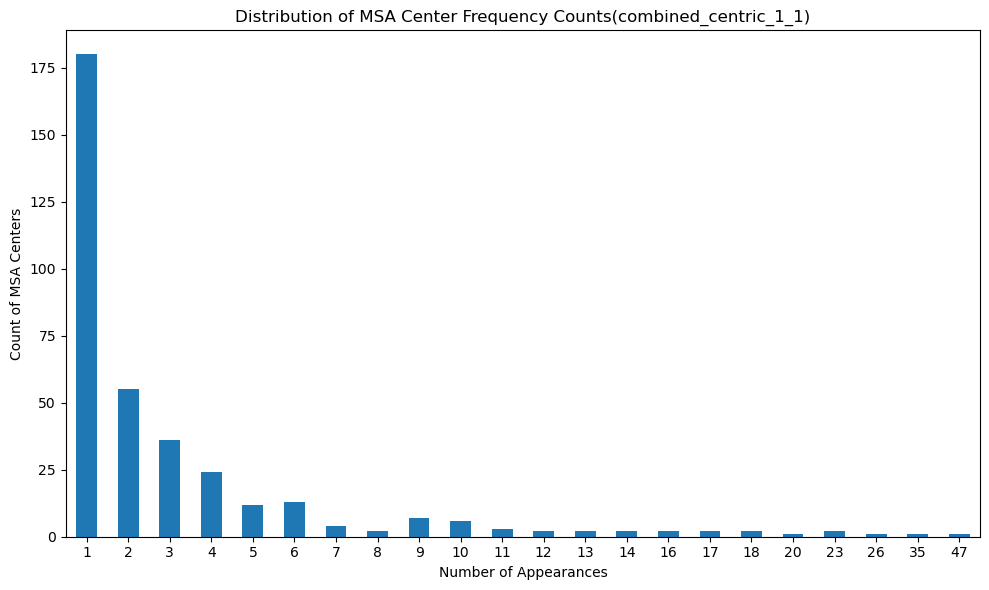

In [295]:
namelsad_counts = combined_centric_1_1['NAMELSAD'].value_counts()
count_distribution_1_1 = namelsad_counts.value_counts().sort_index()

# create a bar plot
plt.figure(figsize=(10, 6))
count_distribution_1_1.plot(kind='bar')
plt.title('Distribution of MSA Center Frequency Counts(combined_centric_1_1)')
plt.xlabel('Number of Appearances')
plt.ylabel('Count of MSA Centers')
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig('Distribution of MSA Center Frequency Counts(combined_centric_1_1).png')
plt.show()

In [296]:
combined_centric_1_1['rank'] = combined_centric_1_1.groupby('NAMELSAD')['tot_pop'].rank(ascending=False, method='first')

def calculate_sd_metrics(group):
    tot_pop = group['tot_pop']
    max_pop = tot_pop.max()
    hypothetical_sd = np.std([max_pop, 0])
    
    result = {}
    
    # 1.1 Calculate the standard deviation of all tot_pop in the group
    sd_all = np.std(tot_pop)
    result['std_dev_all'] = 1 - (sd_all / hypothetical_sd)
    
    # 1.2 Calculate the standard deviation of the top 2 to top 15 rankings separately
    for i in range(2, 16):
        if len(tot_pop) >= i:
            sd_top_i = np.std(tot_pop.nlargest(i))
            result[f'std_dev_{i}'] = 1 - (sd_top_i / hypothetical_sd)
        else:
            result[f'std_dev_{i}'] = np.nan
    
    # Calculate the mean of the standard deviations for rankings 2, 3, and 4
    ranks_2_to_4 = [result.get(f'std_dev_{i}', np.nan) for i in range(2, 5)]
    ## calculate the average only if when all values of 'std_dev_2','std_dev_3','std_dev_4' are not NaN
    if all(not np.isnan(value) for value in ranks_2_to_4):
        result['avg_std_dev_2_to_4'] = np.mean(ranks_2_to_4)
    else:
        result['avg_std_dev_2_to_4'] = np.nan
    
    return pd.Series(result)

In [297]:
# Apply the function to each group
sd_metrics_1_1 = combined_centric_1_1.groupby('NAMELSAD').apply(calculate_sd_metrics).reset_index()
sd_metrics_1_1['std_dev_all'] = sd_metrics_1_1['std_dev_all'].apply(lambda x: 0 if x == 1 else x)
sd_metrics_1_1['avg_std_dev_2_to_4'] = sd_metrics_1_1['avg_std_dev_2_to_4'].apply(lambda x: 0 if pd.isna(x) else x)

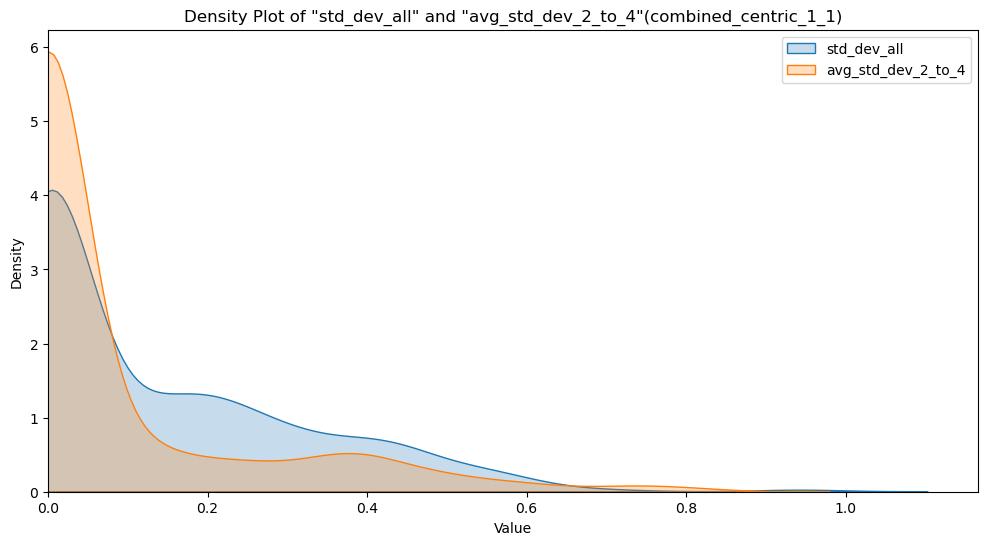

In [298]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 、setting the size of the figure
plt.figure(figsize=(12, 6))

# drawing the density figure of the std_dev_all
sns.kdeplot(sd_metrics_1_1['std_dev_all'], label='std_dev_all', fill=True)

# drawing the density figure of the avg_std_dev_2_to_4
sns.kdeplot(sd_metrics_1_1['avg_std_dev_2_to_4'], label='avg_std_dev_2_to_4', fill=True)

plt.xlim(0, None)

plt.title('Density Plot of "std_dev_all" and "avg_std_dev_2_to_4"(combined_centric_1_1)')
plt.xlabel('Value')
plt.ylabel('Density')

plt.legend()

plt.savefig('Density Plot of std_dev_all and avg_std_dev_2_to_4(combined_centric_1_1).png')
plt.show()

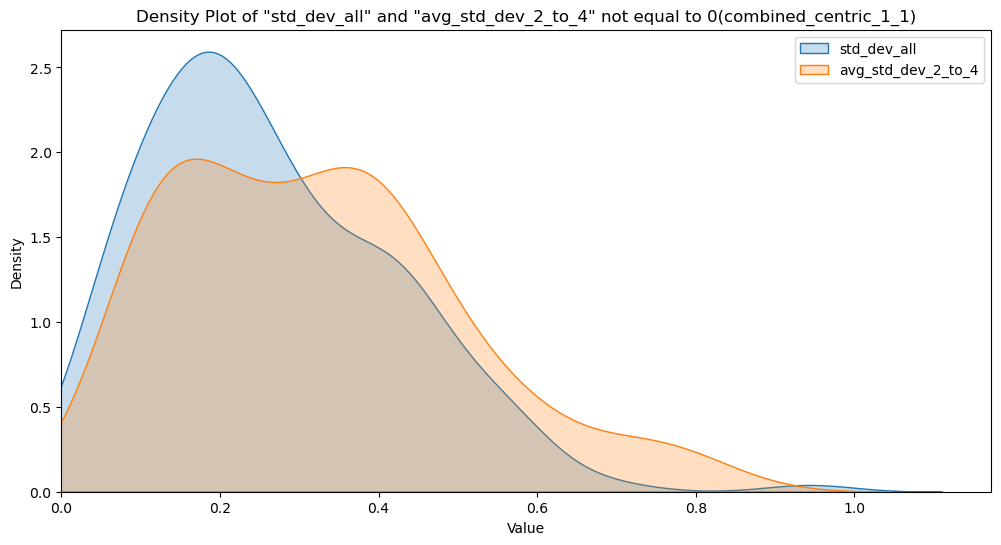

In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

std_dev_all_filtered = sd_metrics_1_1[sd_metrics_1_1['std_dev_all'] != 0]['std_dev_all']

avg_std_dev_2_to_4_filtered = sd_metrics_1_1[sd_metrics_1_1['avg_std_dev_2_to_4'] != 0]['avg_std_dev_2_to_4']

sns.kdeplot(std_dev_all_filtered, label='std_dev_all', fill=True)

sns.kdeplot(avg_std_dev_2_to_4_filtered, label='avg_std_dev_2_to_4', fill=True)

plt.xlim(0, None)

plt.title('Density Plot of "std_dev_all" and "avg_std_dev_2_to_4" not equal to 0(combined_centric_1_1)')
plt.xlabel('Value')
plt.ylabel('Density')

plt.legend()

plt.savefig('Density Plot of std_dev_all and avg_std_dev_2_to_4 not equal to 0(combined_centric_1_1).png')
plt.show()

In [300]:
namelsad_counts = pd.DataFrame(namelsad_counts).reset_index()
namelsad_counts = namelsad_counts.rename(columns={'count':'count_centers'})
sd_metrics_1_1 = sd_metrics_1_1.merge(namelsad_counts, left_on='NAMELSAD', right_on='NAMELSAD', how='left')

In [301]:
sd_metrics_1_1.to_csv('sd_metrics_1_1.csv', index=False)

In [302]:
# create 'hypothetical_top' column, the pop of rank 1 is the 1. the pop of rank 2 is the 1/2, the pop of rank 3 is the 1/3, and so on
combined_centric_1_1['hypothetical_top'] = (1 / combined_centric_1_1['rank']).round(4)

In [303]:
def calculate_sd_metrics(group):
    tot_pop = group['hypothetical_top']
    max_pop = tot_pop.max()
    hypothetical_sd = np.std([max_pop, 0])
    
    result = {}
    
    # 1.1 Calculate the standard deviation of all tot_pop in the group
    sd_all = np.std(tot_pop)
    result['hy_std_dev_all'] = 1 - (sd_all / hypothetical_sd)
    
    # 1.2 Calculate the standard deviation of the top 2 to top 15 rankings separately
    for i in range(2, 16):
        if len(tot_pop) >= i:
            sd_top_i = np.std(tot_pop.nlargest(i))
            result[f'hy_std_dev_{i}'] = 1 - (sd_top_i / hypothetical_sd)
        else:
            result[f'hy_std_dev_{i}'] = np.nan
    
    # Calculate the mean of the standard deviations for rankings 2, 3, and 4
    ranks_2_to_4 = [result.get(f'hy_std_dev_{i}', np.nan) for i in range(2, 5)]
    ## calculate the average only if when all values of 'std_dev_2','std_dev_3','std_dev_4' are not NaN
    if all(not np.isnan(value) for value in ranks_2_to_4):
        result['hy_avg_std_dev_2_to_4'] = np.mean(ranks_2_to_4)
    else:
        result['hy_avg_std_dev_2_to_4'] = np.nan
    
    return pd.Series(result)

In [304]:
# Apply the function to each group
hy_sd_metrics_1_1 = combined_centric_1_1.groupby('NAMELSAD').apply(calculate_sd_metrics).reset_index()
hy_sd_metrics_1_1['hy_std_dev_all'] = hy_sd_metrics_1_1['hy_std_dev_all'].apply(lambda x: 0 if x == 1 else x)
hy_sd_metrics_1_1['hy_avg_std_dev_2_to_4'] = hy_sd_metrics_1_1['hy_avg_std_dev_2_to_4'].apply(lambda x: 0 if pd.isna(x) else x)

In [305]:
hy_sd_metrics_1_1.columns = hy_sd_metrics_1_1.columns.str.replace('hy_', '')

# create a new DataFrame to store the sp values
sp_n_1_1 = pd.DataFrame()

for column in sd_metrics_1_1.columns:
    if column not in ['NAMELSAD', 'count_centers']:

        denominator = hy_sd_metrics_1_1[column].replace(0, np.nan)
        sp_n_1_1[column] = sd_metrics_1_1[column] / denominator
        sp_n_1_1[column] = sp_n_1_1[column].round(4)
    else:
        sp_n_1_1[column] = sd_metrics_1_1[column]

In [306]:
sp_n_1_1 = sp_n_1_1.merge(namelsad_counts, left_on='NAMELSAD', right_on='NAMELSAD', how='left')

In [307]:
sp_n_1_1.to_csv('stepwise_sp_values_1_1.csv', index=False)

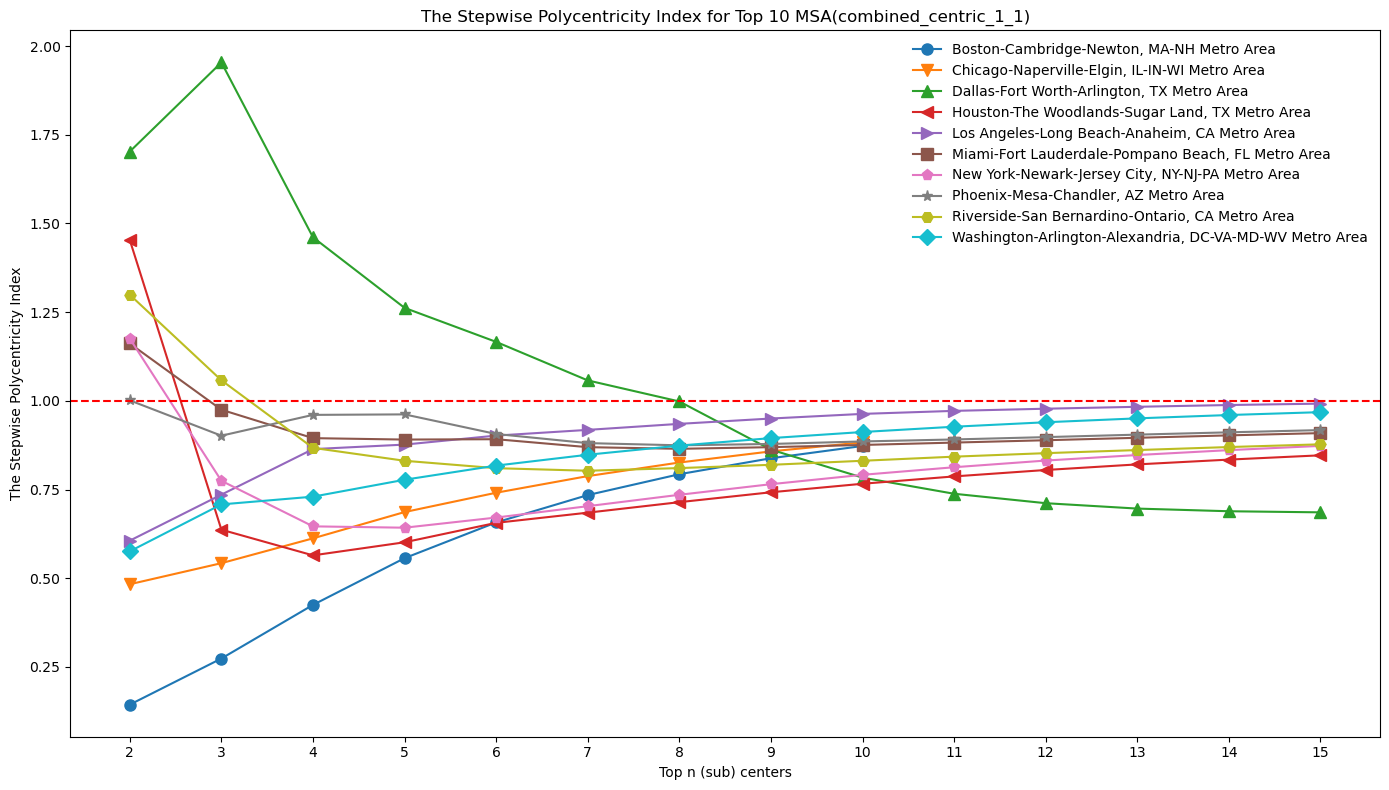

In [308]:
msa_top_10 = ['New York-Newark-Jersey City, NY-NJ-PA Metro Area',
              'Los Angeles-Long Beach-Anaheim, CA Metro Area',
              'Chicago-Naperville-Elgin, IL-IN-WI Metro Area',
              'Dallas-Fort Worth-Arlington, TX Metro Area',
              'Houston-The Woodlands-Sugar Land, TX Metro Area',
              'Washington-Arlington-Alexandria, DC-VA-MD-WV Metro Area',
              'Miami-Fort Lauderdale-Pompano Beach, FL Metro Area',
              'Phoenix-Mesa-Chandler, AZ Metro Area',
              'Boston-Cambridge-Newton, MA-NH Metro Area',
              'Riverside-San Bernardino-Ontario, CA Metro Area']

sp_n_csa_top_5 = sp_n_1_1[sp_n_1_1['NAMELSAD'].isin(msa_top_10)].reset_index(drop=True)


plt.figure(figsize=(14, 8))
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'H', 'D']

for i, row in sp_n_csa_top_5.iterrows():
    x = list(range(2, 16))
    y = row[2:].values[:14]  
    plt.plot(x, y, marker=markers[i], label=row['NAMELSAD'], linestyle='-', markersize=8)

plt.axhline(y=1, color='red', linestyle='--')

plt.title('The Stepwise Polycentricity Index for Top 10 MSA(combined_centric_1_1)')
plt.xlabel('Top n (sub) centers')
plt.ylabel('The Stepwise Polycentricity Index')
plt.xticks(ticks=list(range(2, 16)), labels=[str(i) for i in range(2, 16)])
plt.legend(frameon=False)
plt.grid(False)

plt.tight_layout()

plt.savefig('The Stepwise Polycentricity Index for Top 10 MSA(combined_centric_1_1).png')
plt.show()

In [309]:
import statsmodels.api as sm

combined_centric_1_1['rank'] = combined_centric_1_1.groupby('NAMELSAD')['ln_tot_pop'].rank(ascending=False, method='first')

def calculate_rank_size_beta(group):
    result = {}
    
    # 1.1 Run OLS model in the whole group
    if len(group) > 1:  # determine if the group has more than one observation
        X = sm.add_constant(group['ln_tot_pop'])  # add a constant term
        model = sm.OLS(group['rank'], X).fit()
        result['beta_all'] = model.params[1]
    else:
        result['beta_all'] = np.nan
    
    # 1.2 Run OLS model of the top 2 to top 15 rankings separately
    for i in range(2, 16):
        if len(group) >= i:
            top_i = group.nlargest(i, 'ln_tot_pop')
            X_top_i = sm.add_constant(top_i['ln_tot_pop'])  
            model_top_i = sm.OLS(top_i['rank'], X_top_i).fit()
            result[f'beta_top_{i}'] = model_top_i.params[1]
        else:
            result[f'beta_top_{i}'] = np.nan
    
    # # Calculate the mean of the beta value for rankings 2, 3, and 4
    betas_2_to_4 = [result.get(f'beta_top_{i}', np.nan) for i in range(2, 5)]
    
    # ## calculate the average only if when all values of 'betas_2_','betas_3','betas_4' are not NaN
    if all(not np.isnan(value) for value in betas_2_to_4):
        result['avg_beta_2_to_4'] = np.mean(betas_2_to_4)
    else:
        result['avg_beta_2_to_4'] = np.nan
    
    return pd.Series(result)

In [310]:
# # Apply the function to each group
beta_metrics_1_1 = combined_centric_1_1.groupby('NAMELSAD').apply(calculate_rank_size_beta).reset_index()

In [311]:
beta_metrics_1_1 = beta_metrics_1_1.merge(namelsad_counts, left_on='NAMELSAD', right_on='NAMELSAD', how='left')

In [312]:
beta_metrics_1_1.to_csv('beta_metrics_1_1.csv', index=False)